# Lab 1 Spectral Analysis and Digital Filters

### Mochamad Ardiansyah NUGRAHA

Import libraries

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from scipy import signal, fft, io

import soundfile as sf
import sounddevice as sd

## Exercise 1 Noisy Signal

The frequency resolution from this signal is 0.1 Hz.

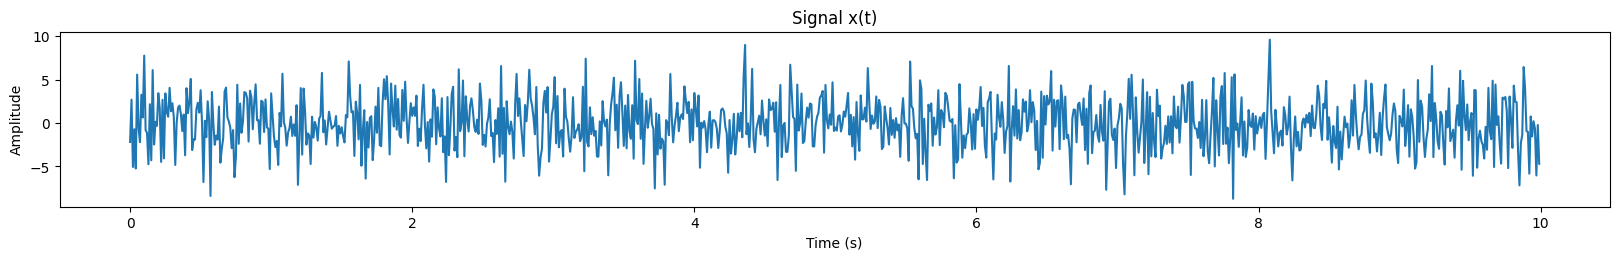

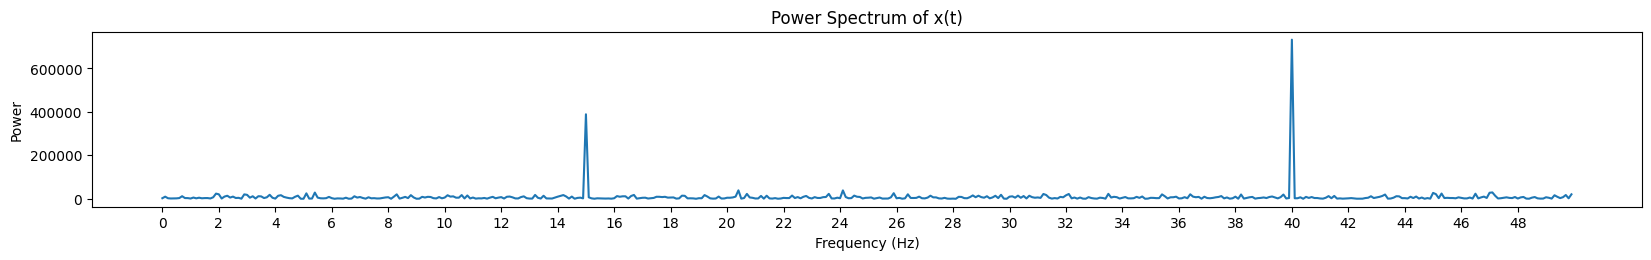

Frequency resolution: 0.1 Hz


In [2]:
Fs = 100.0
Ts = 1/Fs 
Tend = 10
N = int(Tend / Ts)

t = np.linspace(0, Tend, N, endpoint=False)

var = 1

w = np.random.normal(0, np.sqrt(var), N) # Gaussian white noise
x = 1.2 * np.sin(30 * np.pi * t) + 1.7 * np.sin(80 * np.pi * t) + 2.5 * w # Original signal

plt.figure(figsize=(20, 5))
plt.subplot(2, 1, 1)
plt.plot(t, x)
plt.title('Signal x(t)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

xf = fft.fft(x) # Fast Fourier Transform of x(t)
freq_xf = fft.fftfreq(N, Ts) # frequency
power_xf = np.abs(xf)**2 # power density

plt.figure(figsize=(20, 5))
plt.subplot(2, 1, 2)
plt.plot(freq_xf[:N//2], power_xf[:N//2]) # display only the positive frequency
plt.title('Power Spectrum of x(t)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.xticks(np.arange(0, 50, 2))
plt.show()

freq_resolution = Fs / N
print("Frequency resolution:", freq_resolution, "Hz")

## Exercise 2 Audio Signal

In this exercise, we do spectral analysis on various audio signals. The obtained fundamental frequency is listed on 2.3.

### 2.1. Import & Play Audio

In [3]:
audio_file = 'Data/Exercise 2/Anote.mp3'
audio, Fs = sf.read(audio_file)
y2Ch = np.array(audio)
# print(y2Ch)
print("Sampling frequency:", Fs, "Hz")

y = y2Ch[:,0]
# print(y)

sd.play(audio, Fs)

Sampling frequency: 44100 Hz


### 2.2. Spectral Analysis

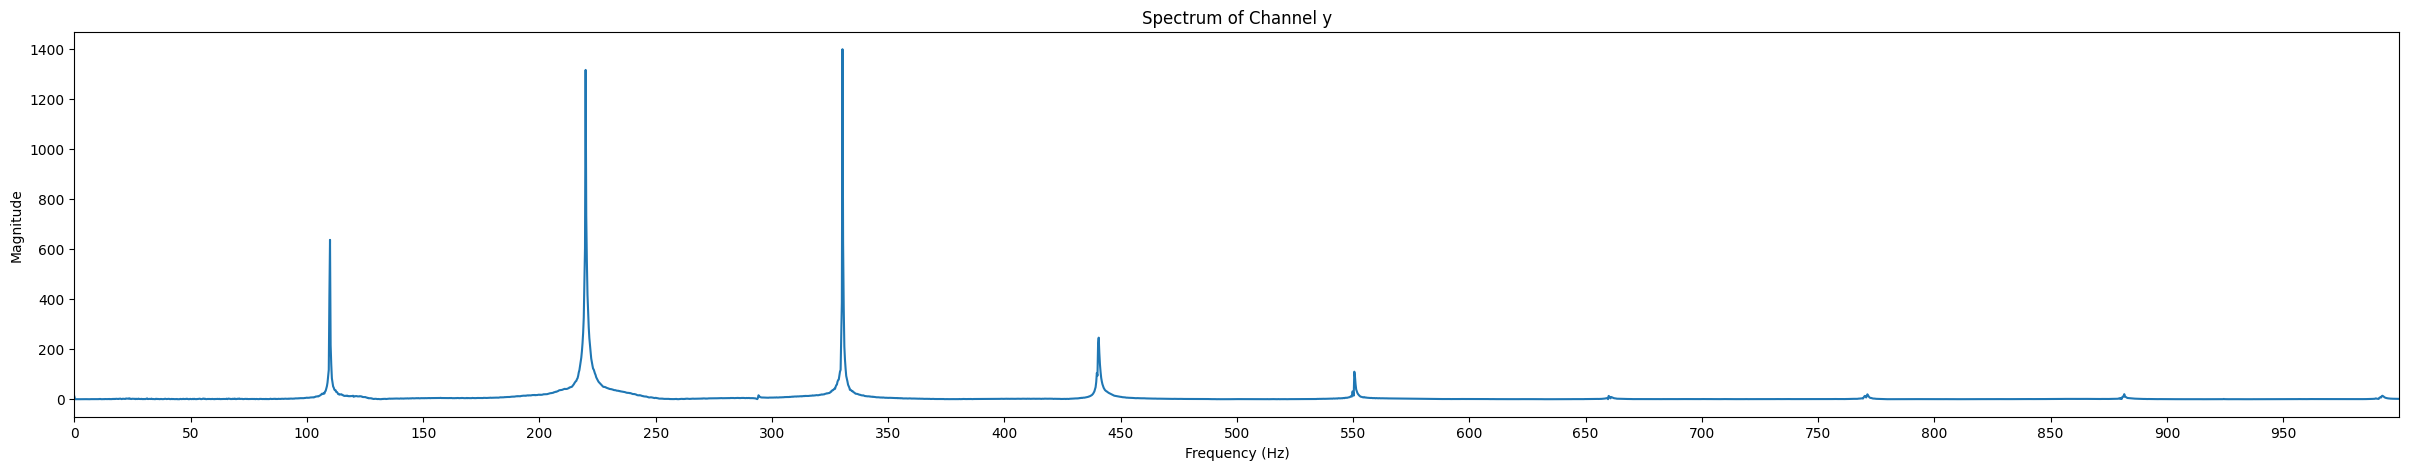

In [4]:
yf= fft.fft(y)
mag_yf = np.abs(yf)
freq_yf = Fs * np.linspace(0, 1, len(mag_yf))
N = int(len(freq_yf))

plt.figure(figsize=(30, 5))
plt.plot(freq_yf[:N//2], mag_yf[:N//2]) # display only the positive frequency
plt.title('Spectrum of Channel y')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim([0, 1000]) 
plt.xticks(np.arange(0, 1000, 50))
plt.show()


### 2.3. Spectrum of Note 1-5

| Note | Frequency (Hz) | Fundamental Note |
| --- | --- | --- |
| 1 | 124 | B2 |
| 2 | 247 | B3 |
| 3 | 392.5 | G4 |
| 4 | 110 | A2 |
| 5 | 165 | E3 |

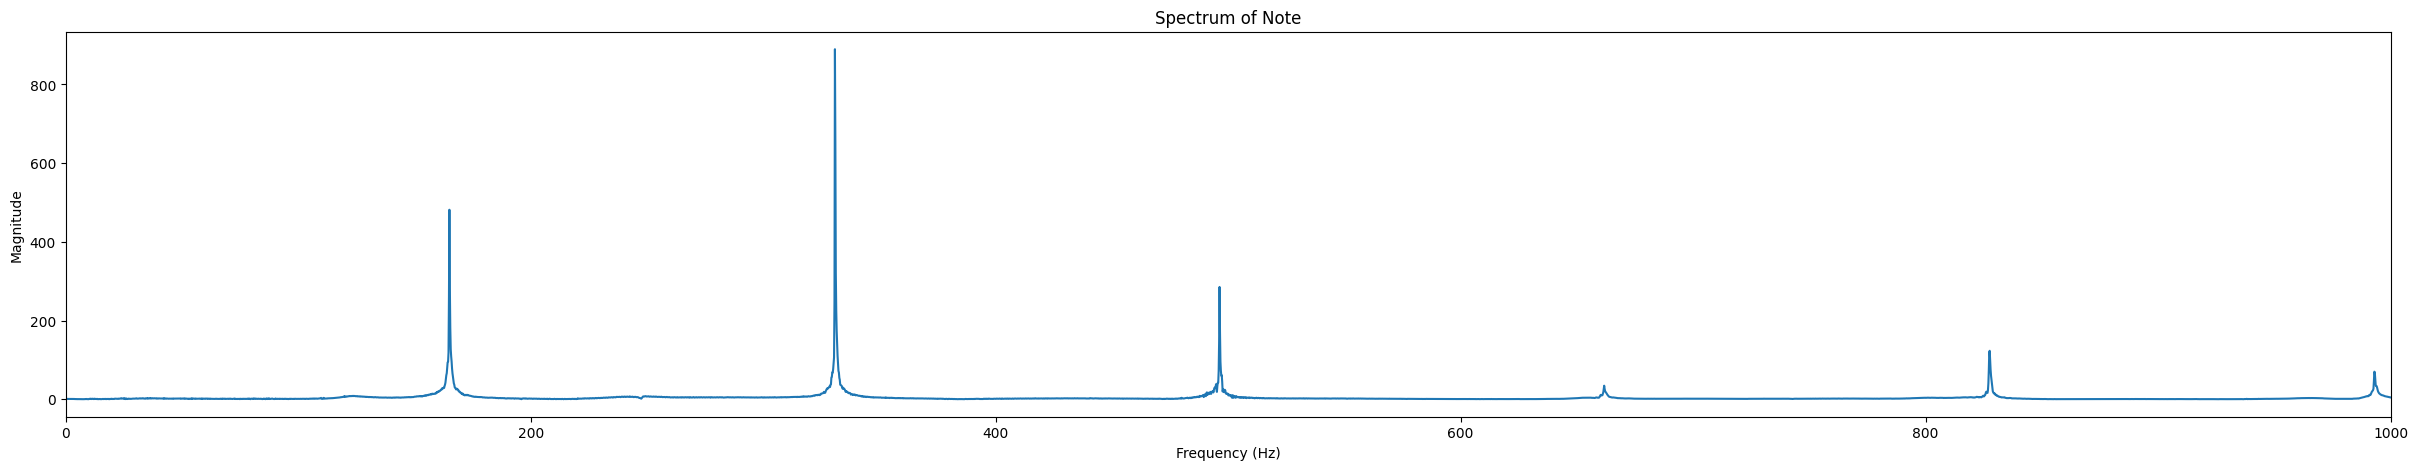

In [5]:
audio_file = 'Data/Exercise 2/note5.mp3' # change note1...note5

audio, Fs = sf.read(audio_file)

y = audio[:,0]

# print(y)
# print(Fs)

yf = fft.fft(y)
mag_yf = np.abs(yf)
freq_yf = Fs * np.linspace(0, 1, len(mag_yf))
N = int(len(freq_yf))

plt.figure(figsize=(30, 5))
plt.plot(freq_yf[:N//2], mag_yf[:N//2]) # display only the positive frequency
plt.title('Spectrum of Note')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim([0, 1000]) 
# plt.xticks(np.arange(100, 125, 1))
plt.show()

sd.play(y, Fs)

## Exercise 3 Telephone Signal

In this exercise, we do several methods to obtain the phone number from the DTMF signal such as manual segmentation and Short Time Fourier Transform/Spectogram.

Firstly, the manual segmentation is done by observing the window length and the overlap time visually from the time domain plot. It is observed that the windown length and the overlap time are 0.11375 s and 0.0125 s, respectively. These 10 segmented signals then converted to frequency domain. We can see the frequency combination (high and low). 

Secondly, we do Short Time Fourier Transform and Spectogram, a built-in function to do time-frequency signal. Both results are the same. It can be seen that the frequency is changing over time.

Hence, we obtain the telephone number of this DTMF signal is 0155930000 (Stade de France).



| Audio file | Number |
| --- | --- |
| number6.mat | 0155930000 (Stade de France) |

1.1375


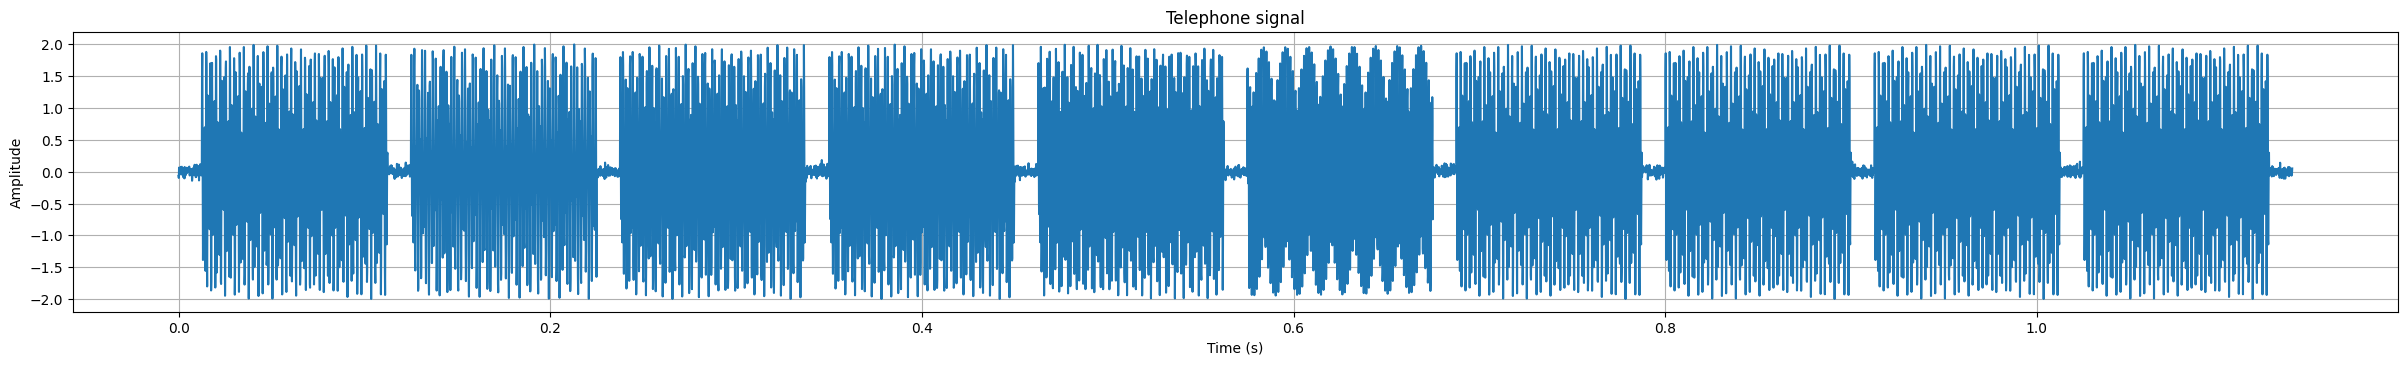

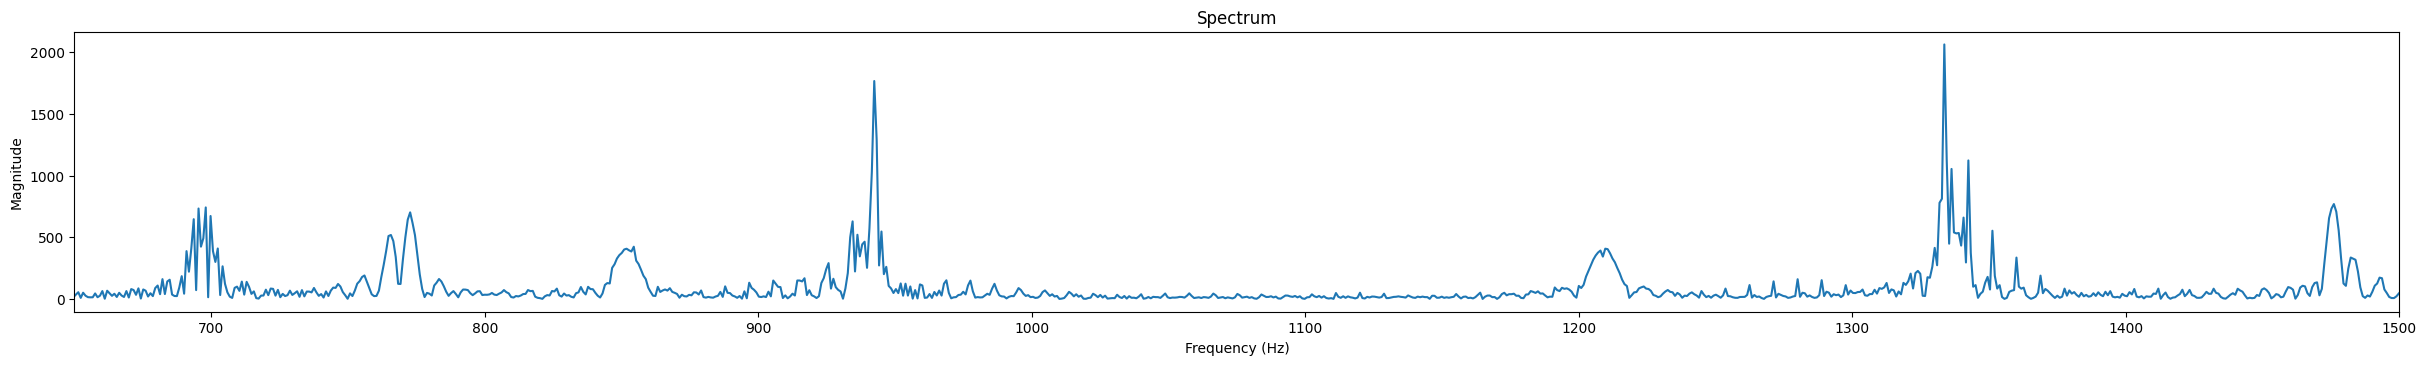

In [6]:
mat_file = 'Data/Exercise 3/number6.mat' # change file number1..number9
mat_contents = io.loadmat(mat_file)

freq_limits = [650, 1500] 

Fs = int(mat_contents['Fs'])
y = np.array(mat_contents['tones'])
y_flat = y.flatten()
# print(y.size)
# print(Fs)

Ts = 1/Fs
N = len(y)
t = np.arange(N) * Ts
print(N * Ts)

plt.figure(figsize=(30, 8))
plt.subplot(2, 1, 1)
plt.plot(t, y_flat)
plt.title('Telephone signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
# plt.xlim([0.125-0.0125, 0.13]) 
# plt.xticks(np.arange(0.125-0.0125, 0.13, 0.0005))
plt.grid(True)


yf = fft.fft(y_flat)
mag_yf = np.abs(yf)
freq_yf = fft.fftfreq(N, Ts)

plt.figure(figsize=(30, 8))
plt.subplot(2, 1, 2)
plt.plot(freq_yf[:N//2], mag_yf[:N//2]) # display only the positive frequency
plt.title('Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(freq_limits) 
# plt.xticks(np.arange(180, 200, 0.5))
plt.show()

sd.play(y, Fs)

### Manual Segmentation

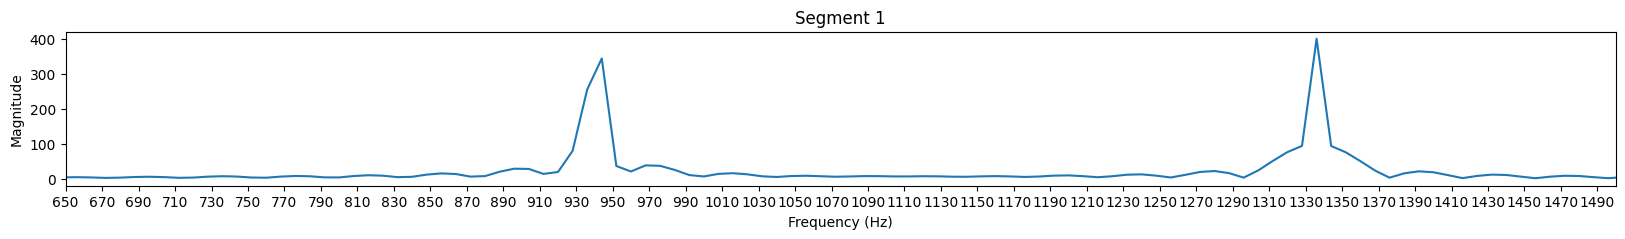

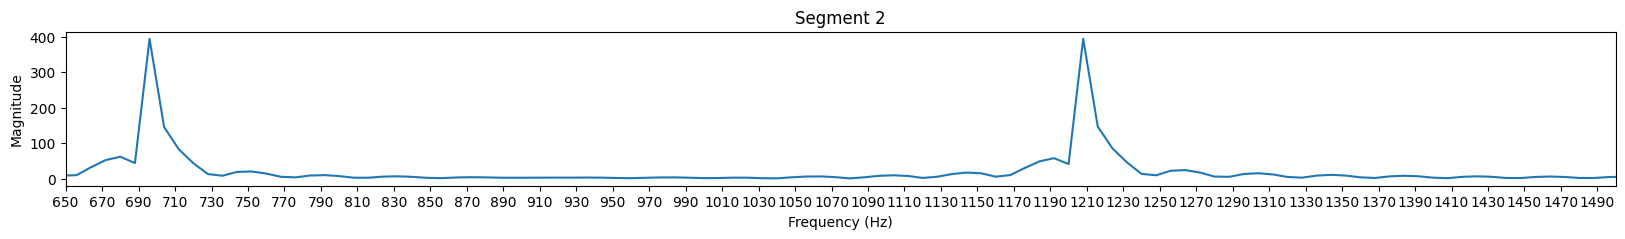

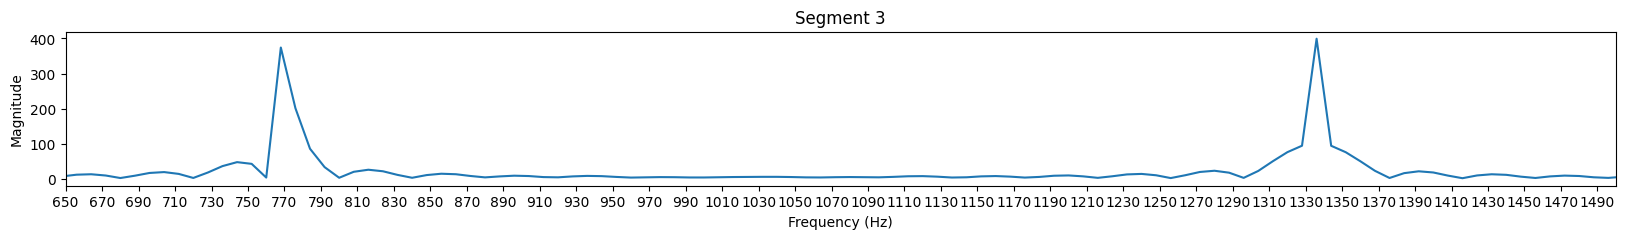

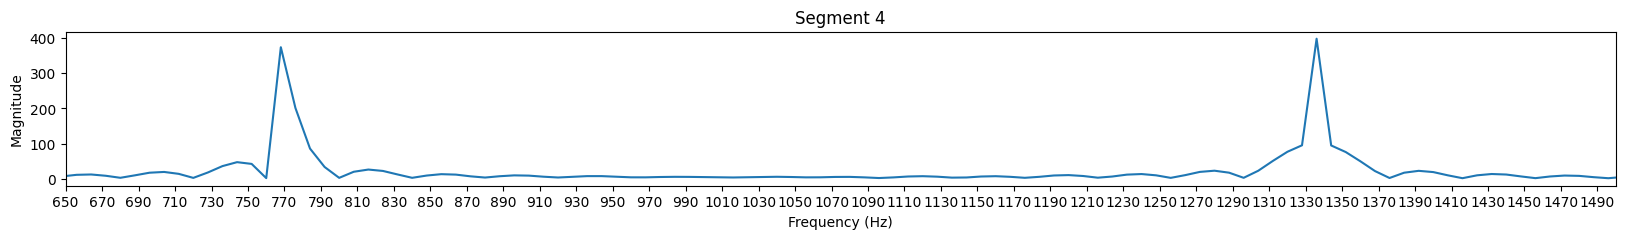

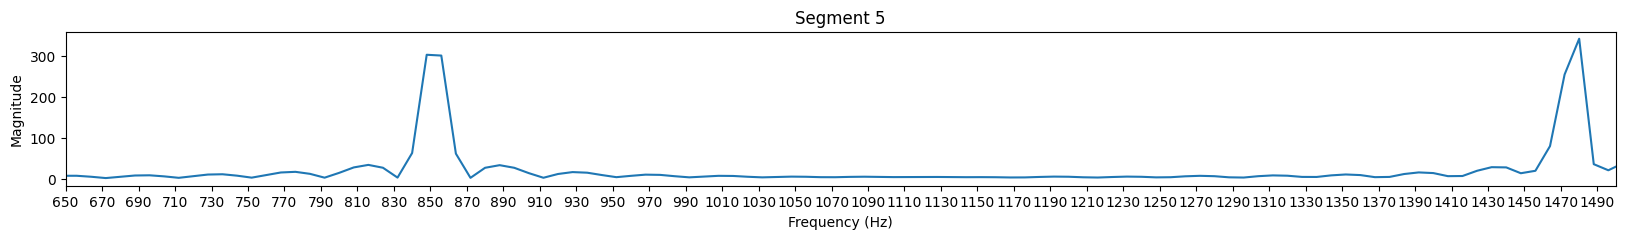

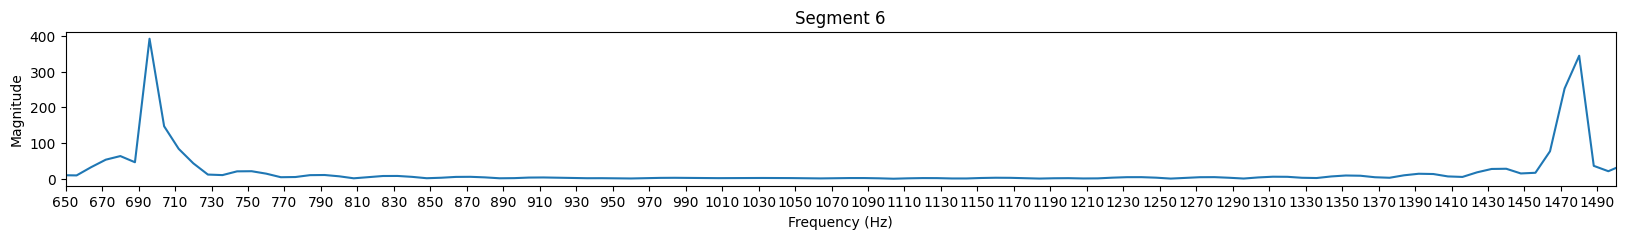

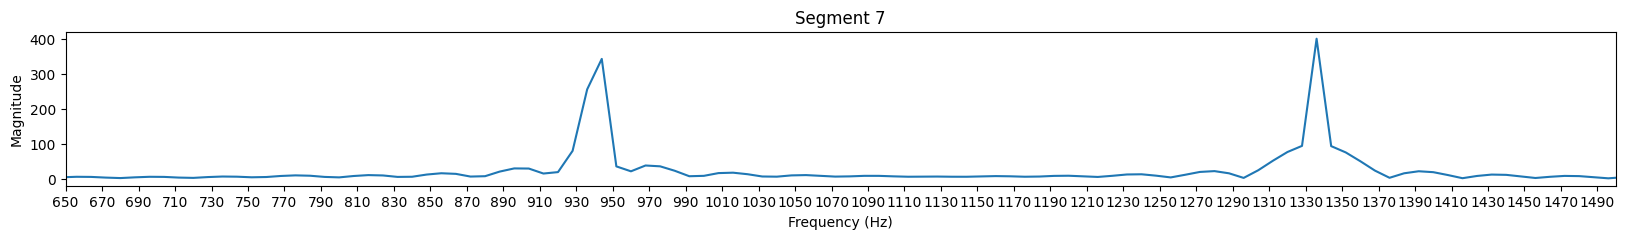

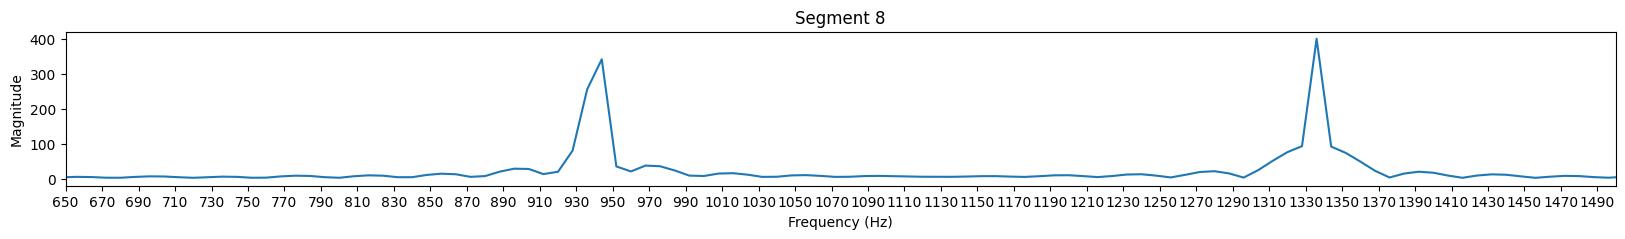

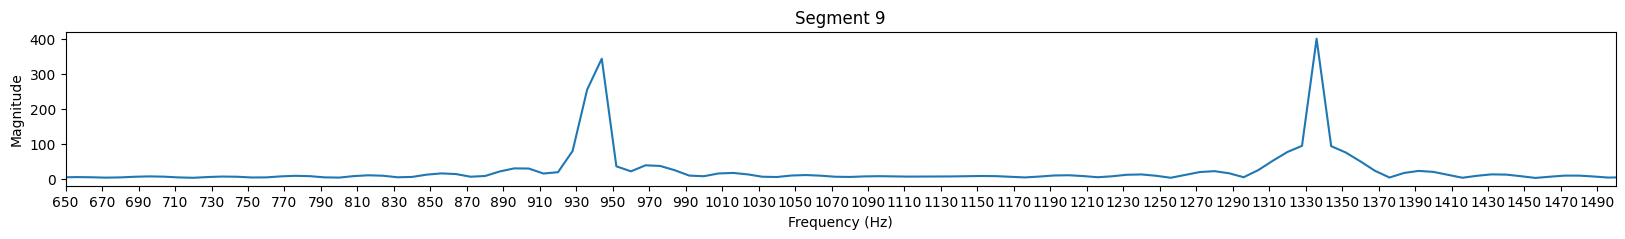

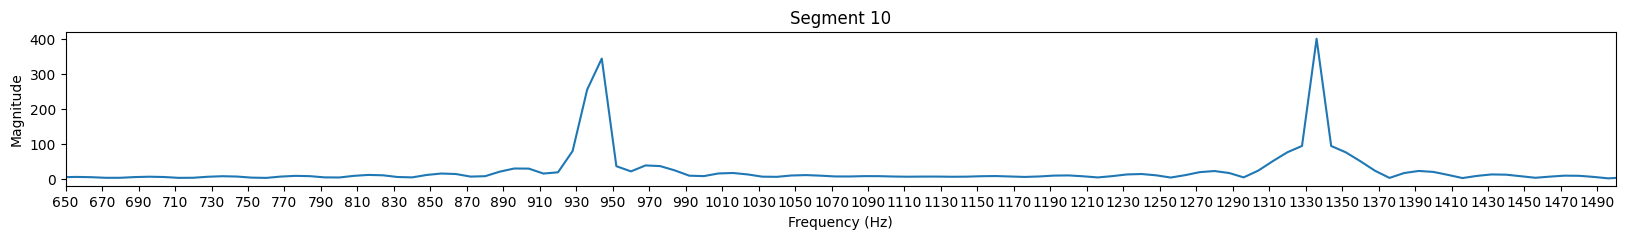

In [7]:
overlap = 0.0125
t_segment = (N * Ts + 9 * overlap) / 10

N_segment = int(t_segment * Fs)
N_overlap = int(overlap * Fs)

# print(N * Ts)
# print(t_segment)
# print(N)
# print(N_segment)
# print(N_overlap)

segments = []
segments_fft = []
freq_yf = fft.fftfreq(N_segment, Ts)
start = 0
end = N_segment

while end <= N:
    segment = y_flat[start:end]
    segment_fft = fft.fft(segment)

    segments.append(segment)
    segments_fft.append(segment_fft)

    start += N_segment - N_overlap
    end += N_segment - N_overlap

# for i, segment in enumerate(segments):
#     plt.figure(figsize=(10, 1))
#     plt.plot(np.arange(N_segment) * Fs, segment)
#     plt.title(f'Segment {i+1}')    
#     plt.xlabel('Time (ms)')
#     plt.ylabel('Amplitude')

for i, segment_fft in enumerate(segments_fft):
    mag_yf = np.abs(segment_fft)
    plt.figure(figsize=(20, 2))
    plt.plot(freq_yf[:N_segment//2], mag_yf[:N_segment//2]) 
    plt.title(f'Segment {i+1}')    
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.xlim(freq_limits)
    plt.xticks(np.arange(650, 1500, 20))


### Short Time Fourier Transform

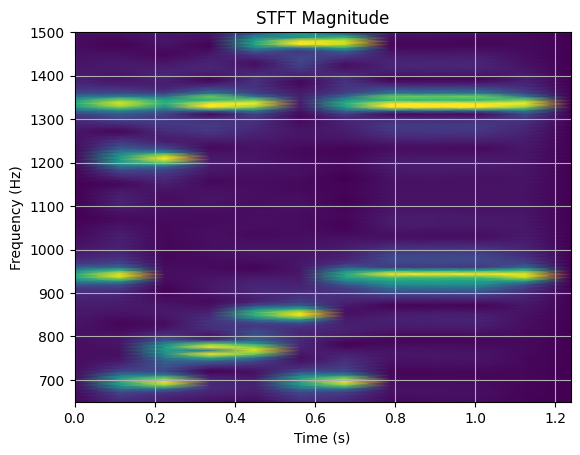

In [8]:
f, t, Zxx = signal.stft(y_flat, fs=Fs, nperseg=N_segment, noverlap=N_overlap)
# plt.figure(figsize=(10, 5))
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=0.25, shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.ylim(freq_limits)
plt.grid(True)
plt.show()

### Spectogram

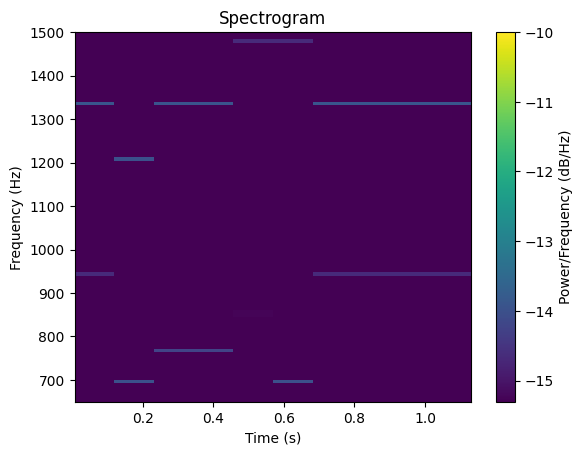

In [9]:
min_threshold = -10
frequencies, times, Sxx = signal.spectrogram(y_flat , fs=Fs, window='hann', nperseg=N_segment, noverlap=N_overlap)

plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='auto', vmin=min_threshold)
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.ylim(freq_limits)
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.show()

## Exercise 4 Audio Signal - Blue Whale

### Conclusion
From the audio signal, it is heard that blue whale generates a periodic sound, that might be used for communication. The first segment sounds different from the rest. In the audio sample, the frequency range is 0-2 kHz with 4 segments with similar segment period around 1.5 s. From the spectral analysis it can be seen that the first segment has higher frequency (900 Hz) and lower amplitude compared to the next segments. The rest of the segments seem like a repetition with peak frequency around 500 Hz. In addition, the overall audio has white noise accross all frequency, as can be seen in the spectrum plot, since the non-peak frequency also has small magnitude (the graph is not smooth).

79572
19.893


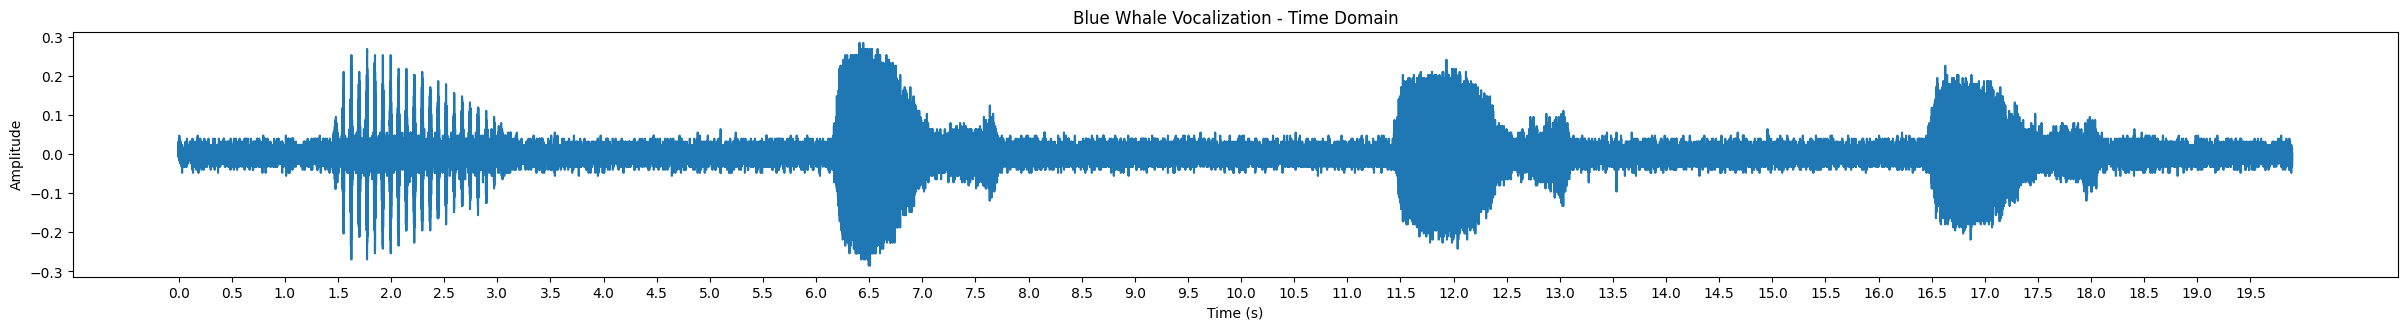

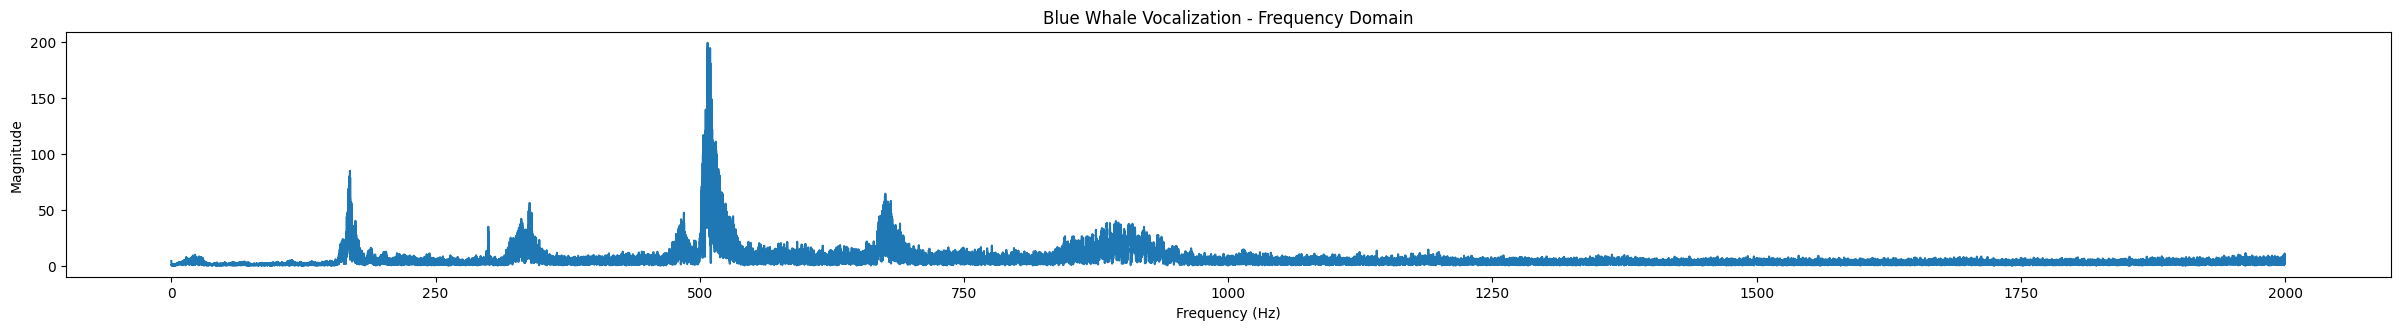

In [10]:
mat_file = 'Data/Exercise 4/bluewhale.mat'
mat_contents = io.loadmat(mat_file)

Fs = int(mat_contents['fs'])
y = np.array(mat_contents['x'])
y_flat = y.flatten()
N = len(y)

Ts = 1/Fs
t = np.arange(0, len(y) * Ts, Ts)

print(N)
print(N * Ts)

plt.figure(figsize=(30, 7))
plt.subplot(2, 1, 1)
plt.plot(t, y_flat)
plt.title('Blue Whale Vocalization - Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xticks(np.arange(0, 20, 0.5))
plt.show()

yf = fft.fft(y_flat)
mag_yf = np.abs(yf)
freq_yf = fft.fftfreq(N, Ts)

plt.figure(figsize=(30, 7))
plt.subplot(2, 1, 2)
plt.plot(freq_yf[:N//2], mag_yf[:N//2])
plt.title('Blue Whale Vocalization - Frequency Domain')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
# plt.xlim(0, 1000)
# plt.xticks(np.arange(0, 20, 0.5))
plt.show()

sd.play(y, Fs)

### Manual Segmentation

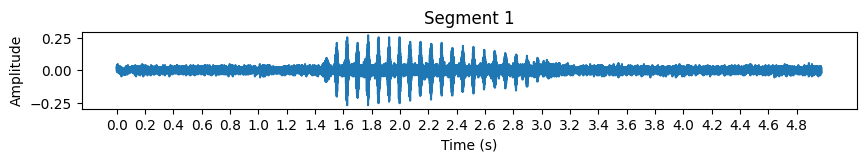

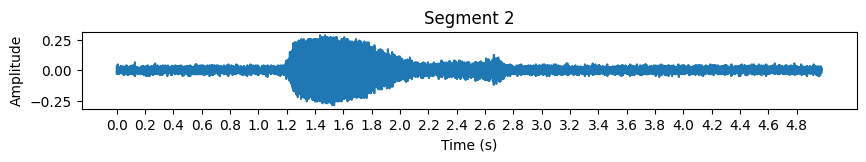

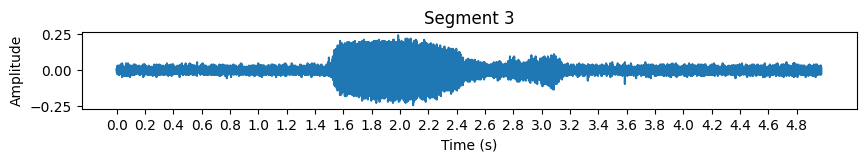

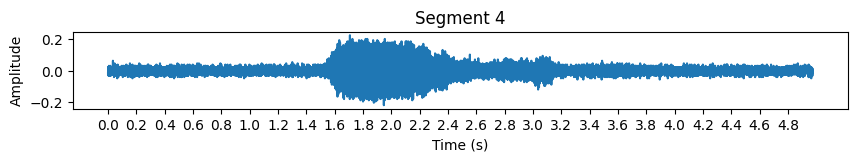

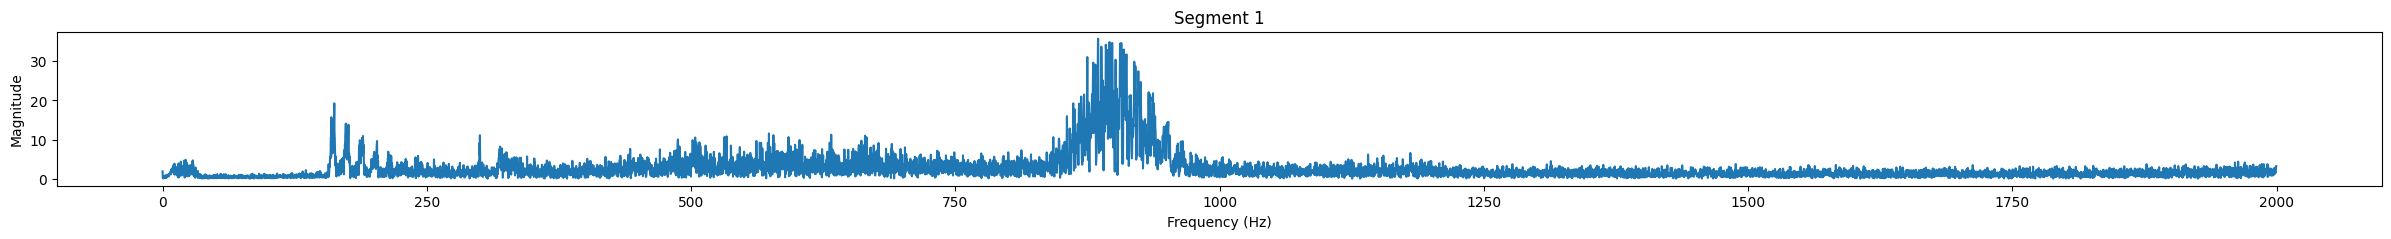

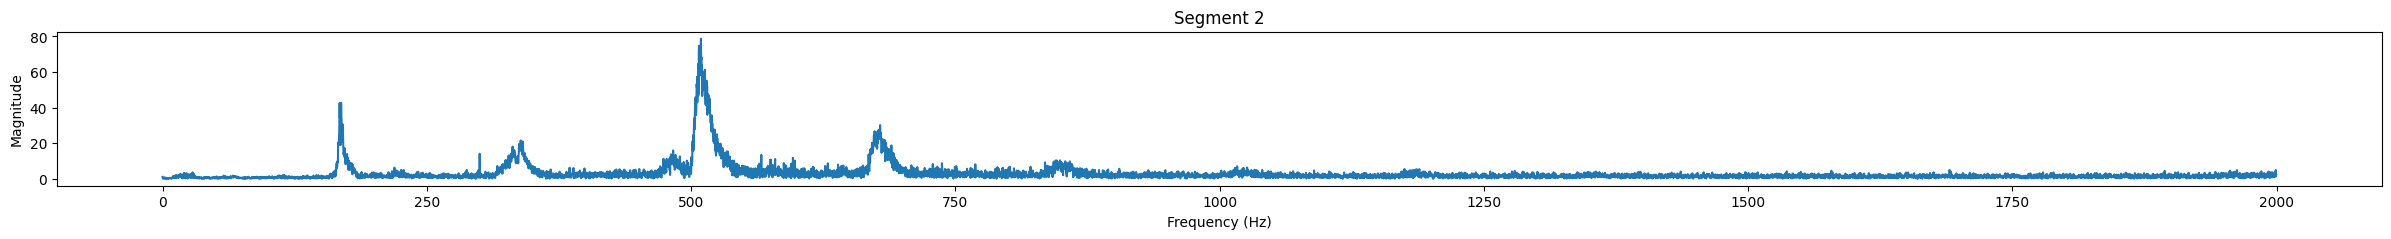

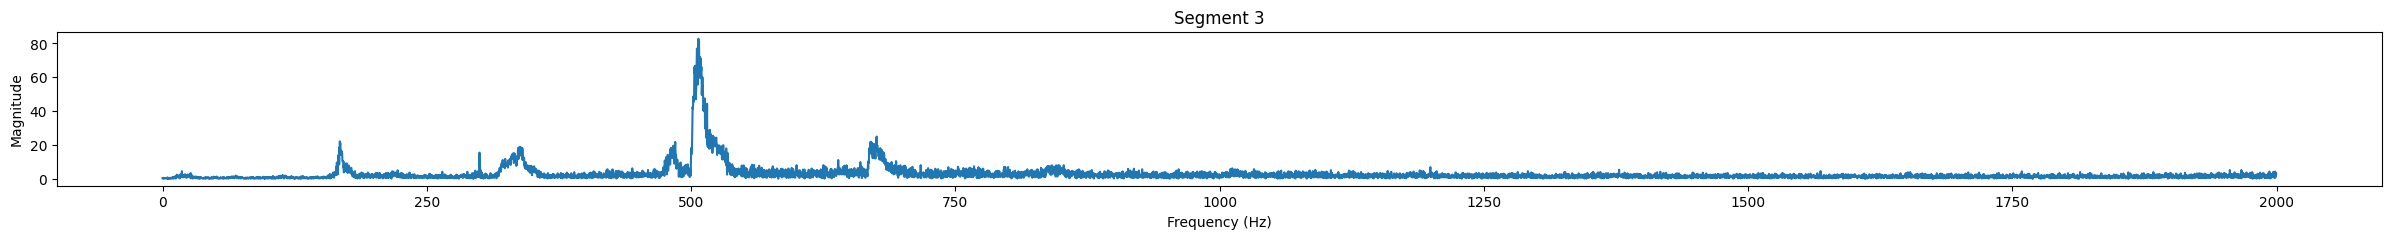

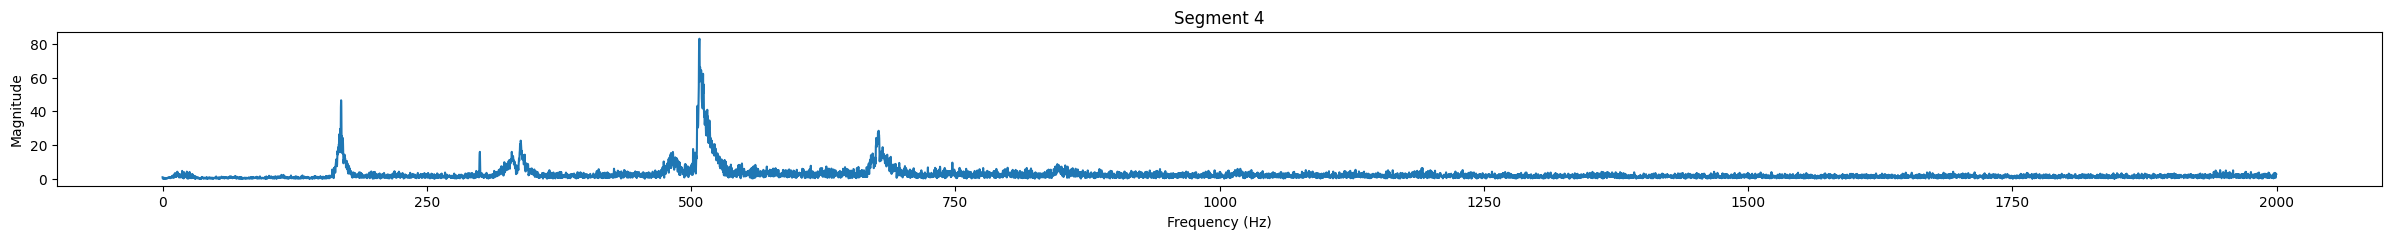

In [11]:
overlap = 0 # assume no overlap between segments
t_segment = N * Ts / 4

N_segment = int(t_segment * Fs)
N_overlap = int(overlap * Fs)

# print(N * Ts)
# print(t_segment)
# print(N)
# print(N_segment)
# print(N_overlap)

segments = []
segments_fft = []
freq_yf = fft.fftfreq(N_segment, Ts)
start = 0
end = N_segment

while end <= N:
    segment = y_flat[start:end]
    segment_fft = fft.fft(segment)

    segments.append(segment)
    segments_fft.append(segment_fft)

    start += N_segment - N_overlap
    end += N_segment - N_overlap

for i, segment in enumerate(segments):
    plt.figure(figsize=(10, 1))
    plt.plot(np.arange(N_segment) * Ts, segment)
    plt.title(f'Segment {i+1}')    
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.xticks(np.arange(0, 5, 0.2))

for i, segment_fft in enumerate(segments_fft):
    mag_yf = np.abs(segment_fft)
    plt.figure(figsize=(30, 2))
    plt.plot(freq_yf[:N_segment//2], mag_yf[:N_segment//2]) 
    plt.title(f'Segment {i+1}')    
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    # plt.xlim(freq_limits)
    # plt.xticks(np.arange(650, 1500, 20))


### Sliding Window

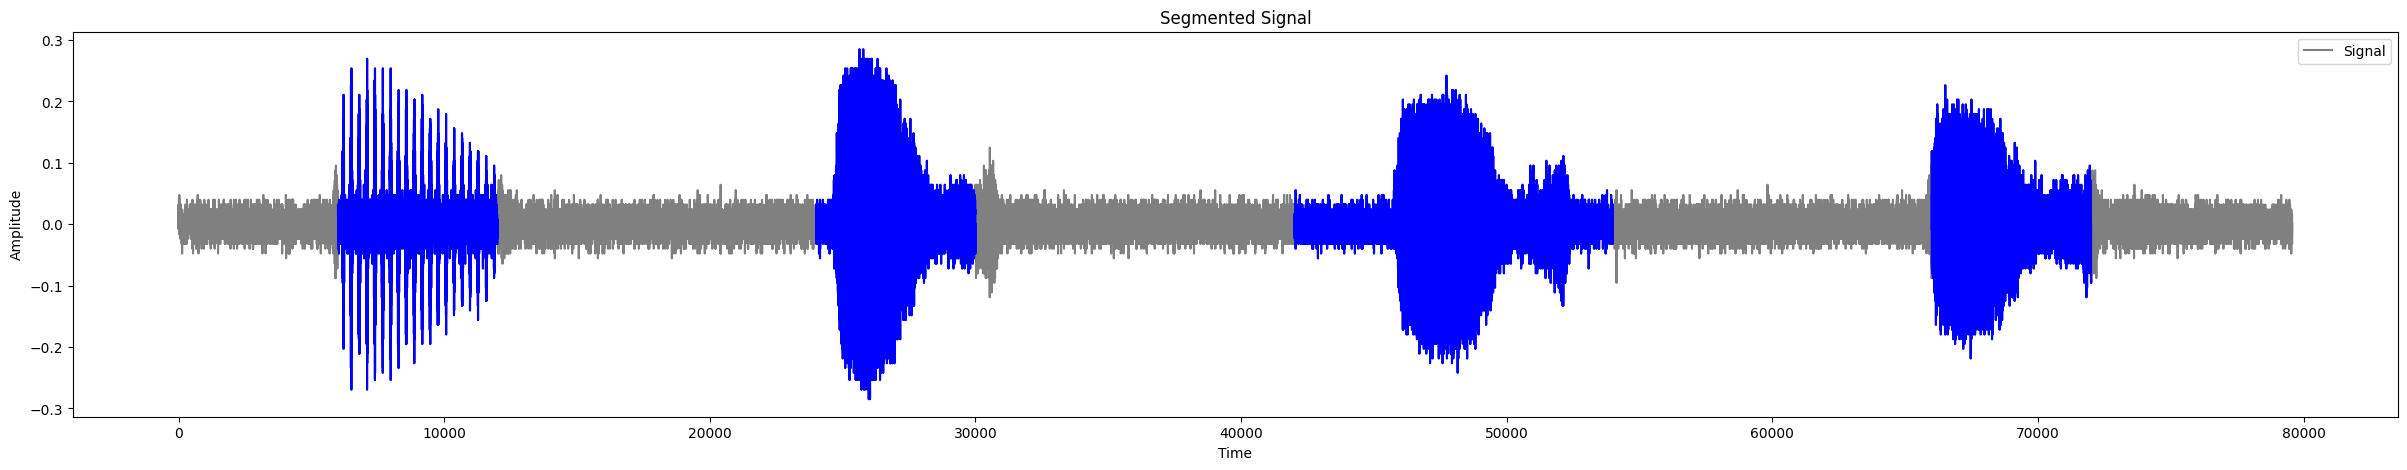

5


In [12]:


def sliding_window(signal, window_size, step_size):
    for i in range(0, len(signal) - window_size + 1, step_size):
        yield signal[i:i+window_size], i

def is_signal(segment, amplitude_threshold, energy_threshold):
    # Compute amplitude and energy of the segment
    amplitude = np.max(np.abs(segment))
    energy = np.sum(segment**2) / len(segment)
    # Check if both amplitude and energy exceed thresholds
    return amplitude > amplitude_threshold and energy > energy_threshold

# Parameters
window_size = 6000  #window size
step_size = 6000  #step size
amplitude_threshold = 0.1  #noise level
energy_threshold = 0.001  # noise level

# Segmentation
segments = []
segments_fft = []
for segment, index in sliding_window(y_flat, window_size, step_size):
    if is_signal(segment, amplitude_threshold, energy_threshold):
        segments.append((segment, index))
        segments_fft.append(fft.fft(segment))

# signal_segments = np.array(segments)
# signal_segments.shape
# Plot segments
plt.figure(figsize=(30, 5))
plt.plot(y_flat, color='gray', label='Signal')
for segment, index in segments:
    plt.plot(np.arange(index, index+len(segment)), segment, color='blue')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Segmented Signal')
plt.legend()
plt.show()

print(len(segments))
# for segment, _ in segments:
#     fft_result = fft.fft(segment)
#     freq = fft.fftfreq(len(segment), Ts)
    
#     # Plot FFT of the segment
#     plt.figure(figsize=(10, 5))
#     plt.plot(freq, np.abs(fft_result))
#     plt.title('FFT of Segment')
#     plt.xlabel('Frequency')
#     plt.ylabel('Magnitude')
#     plt.grid(True)
#     plt.show()

# for i, segment_fft in enumerate(segments_fft):
#     mag_yf = np.abs(segment_fft)
#     freq_yf = fft.fftfreq(window_size, Ts)
#     plt.figure(figsize=(30, 5))
#     plt.plot(freq_yf, mag_yf)
#     plt.title(f'Segment {i+1}')    
#     plt.xlabel('Frequency (Hz)')
#     plt.ylabel('Magnitude')


### Short Time Fourier Transform


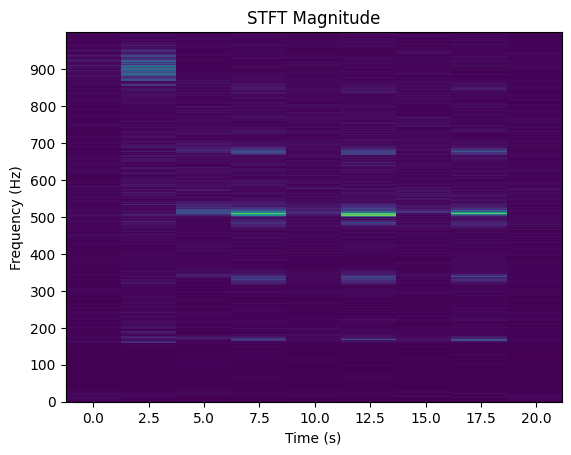

In [13]:
freq_limits = (0, 1000)
f, t, Zxx = signal.stft(y_flat, fs=Fs, nperseg=N_segment)

plt.pcolormesh(t, f, np.abs(Zxx))
plt.title('STFT Magnitude')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.ylim(freq_limits)
plt.yticks(np.arange(0, 1000, 100))
# plt.grid(True)
plt.show()

## Exercise 5 FIR Filter

The goal of this exercise is to remove high frequency noise (>75 Hz) from an ECG signal using FIR low pass filter. The FIR low-pass filter and group delay function are called from scipy library.

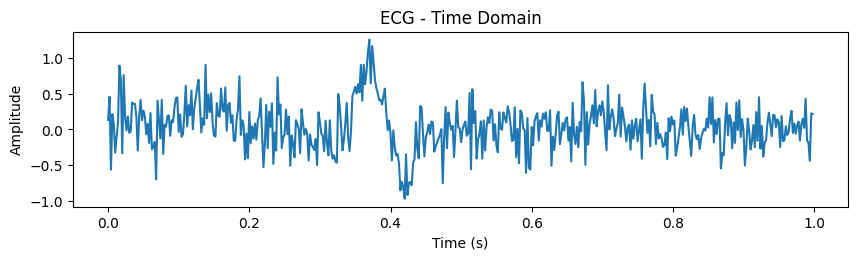

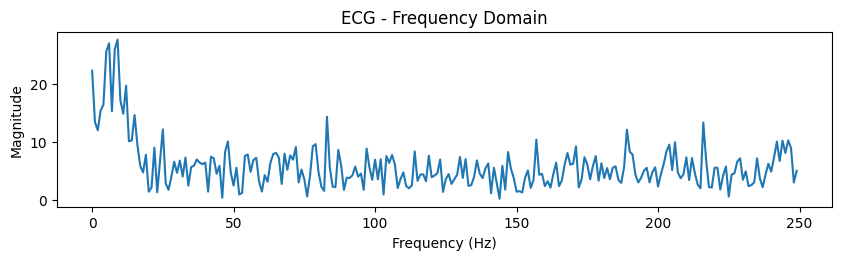

In [14]:
mat_file = 'Data/Exercise 5/ecgdata.mat'
mat_contents = io.loadmat(mat_file)

Fs = int(mat_contents['Fs'])
y = np.array(mat_contents['x'])
y_flat = y.flatten()
N = len(y)

Ts = 1/Fs
t = np.arange(0, len(y) * Ts, Ts)

# print(N)
# print(N * Ts)

plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(t, y_flat)
plt.title('ECG - Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
# plt.xticks(np.arange(0, 20, 0.5))
plt.show()

yf = fft.fft(y_flat)
mag_yf = np.abs(yf)
freq_yf = fft.fftfreq(N, Ts)

plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 2)
plt.plot(freq_yf[:N//2], mag_yf[:N//2])
plt.title('ECG - Frequency Domain')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
# plt.xlim(0, 1000)
# plt.xticks(np.arange(0, 20, 0.5))
plt.show()

### FIR Low Pass Filter

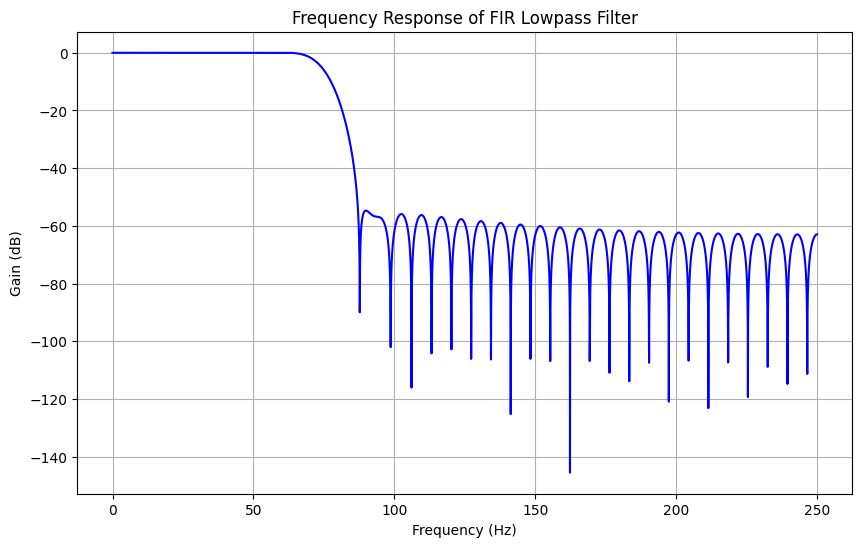

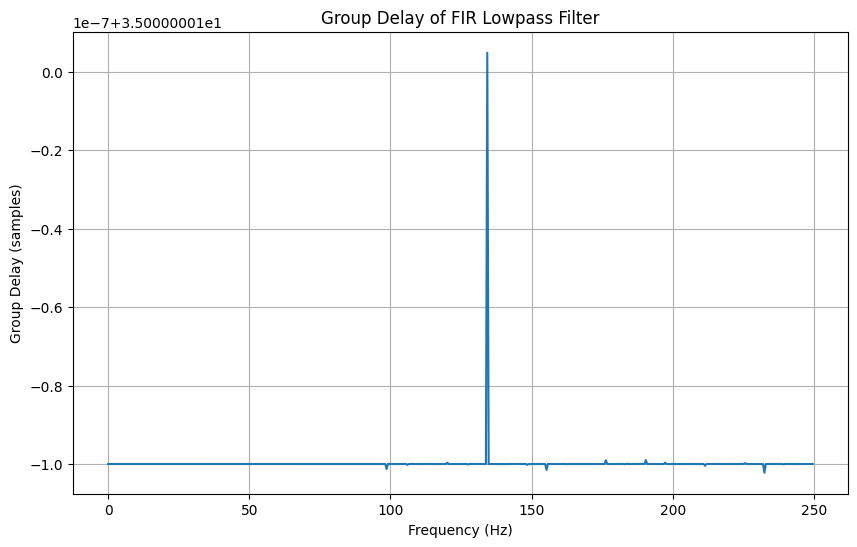

In [15]:
order = 70
cutoff_hz = 75

# normalized cutoff frequency
nyquist = 0.5 * Fs
cutoff_norm = cutoff_hz / nyquist

# FIR
filter_coeff = signal.firwin(order + 1, cutoff_norm, window='hamming')

#  frequency response
freq, response = signal.freqz(filter_coeff, worN=8000, fs=Fs)

# group delay
w, gd = signal.group_delay((filter_coeff, 1), fs=Fs)

# frequency response
plt.figure(figsize=(10, 6))
plt.plot(freq, 20 * np.log10(np.abs(response)), 'b')
plt.title("Frequency Response of FIR Lowpass Filter")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain (dB)')
plt.grid()
plt.show()

# group delay
plt.figure(figsize=(10, 6))
plt.plot(w, gd)
plt.title("Group Delay of FIR Lowpass Filter")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Group Delay (samples)')
plt.grid()
plt.show()


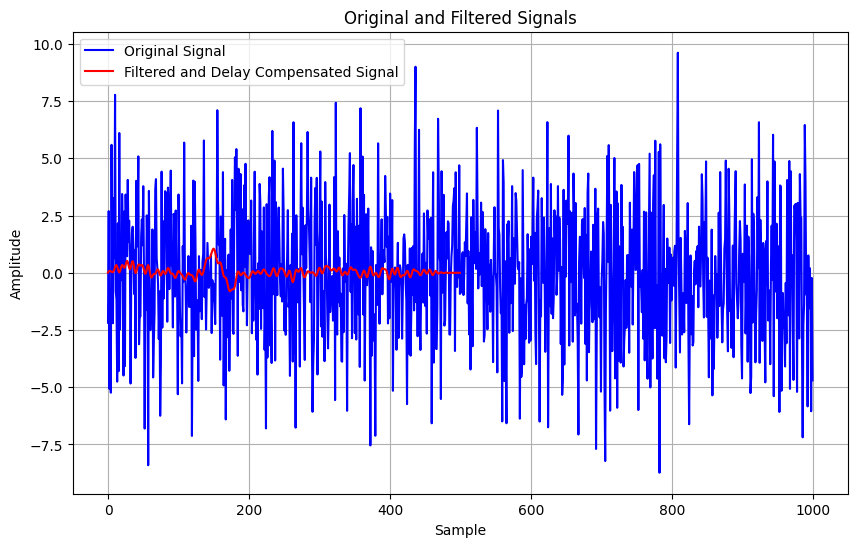

In [16]:
# append D zeros at the end of the input signal
D = int(np.ceil(np.max(gd)))  # group delay
y_extended = np.append(y_flat, np.zeros(D))

# filter the extended input signal
filtered_signal = signal.filtfilt(filter_coeff, 1, y_extended)

# compensate for the delay by shifting the output signal
filtered_signal_delay_compensated = filtered_signal[D:]

# original and filtered signals
plt.figure(figsize=(10, 6))
plt.plot(x, label='Original Signal', color='blue')
plt.plot(filtered_signal_delay_compensated, label='Filtered and Delay Compensated Signal', color='red')
plt.title("Original and Filtered Signals")
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()


## Practical Problem

Upon doing spectral analysis, two noises are identified. The low frequency "hum" noise at 60 Hz with magnitude 105 dB and the white noise across all frequency with average magnitude range at -15 to 30 dB.

Since the 60 Hz noise has very high magnitude, firslty we filter the signal separately focus on 60 Hz. We suppress this noise by using band stop filter.

Secondly, from the frequency domain it can be seen that we can remove frequency below 60 Hz and above 1600 Hz. Hence, we do band pass filter on this part.

Lastly, we do median filtering to smoothen then signal.

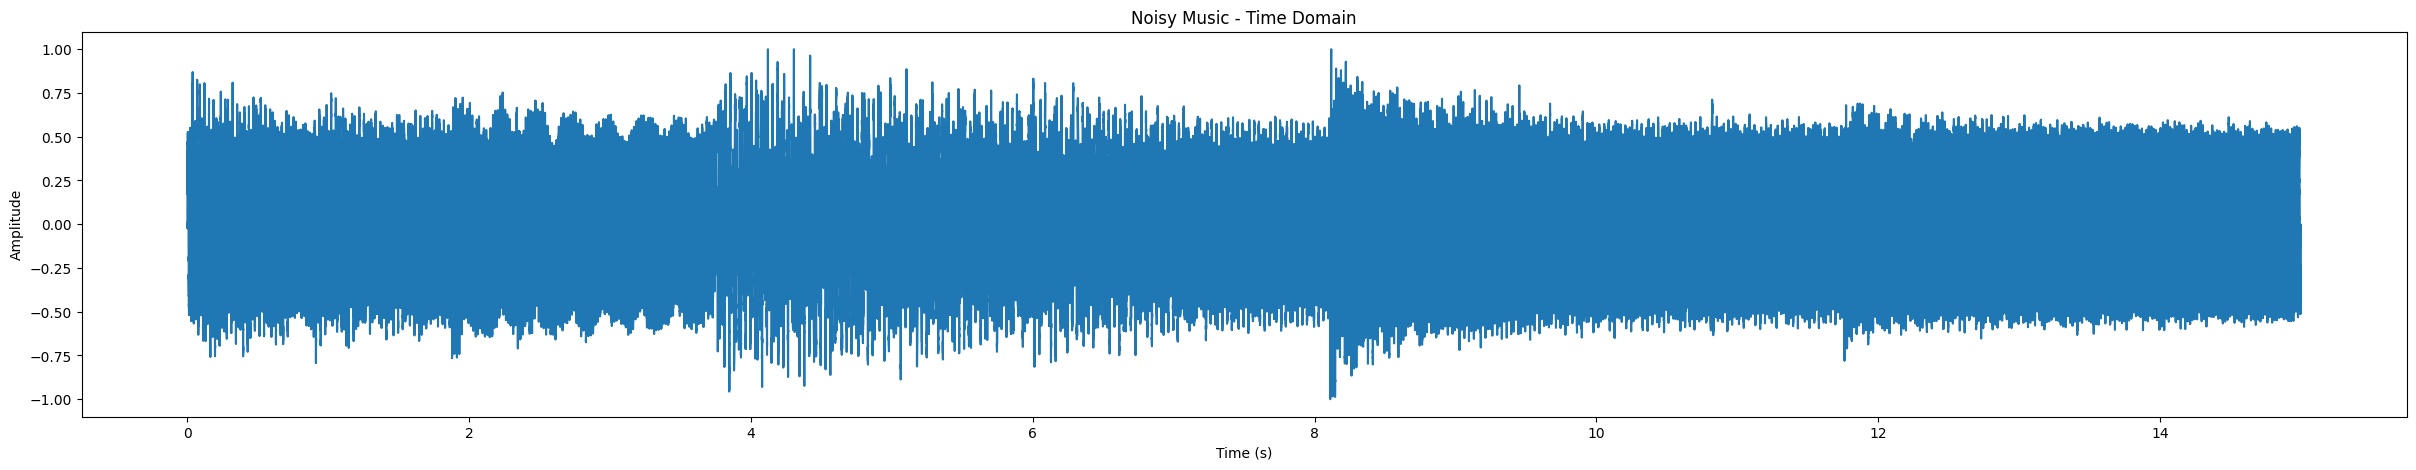

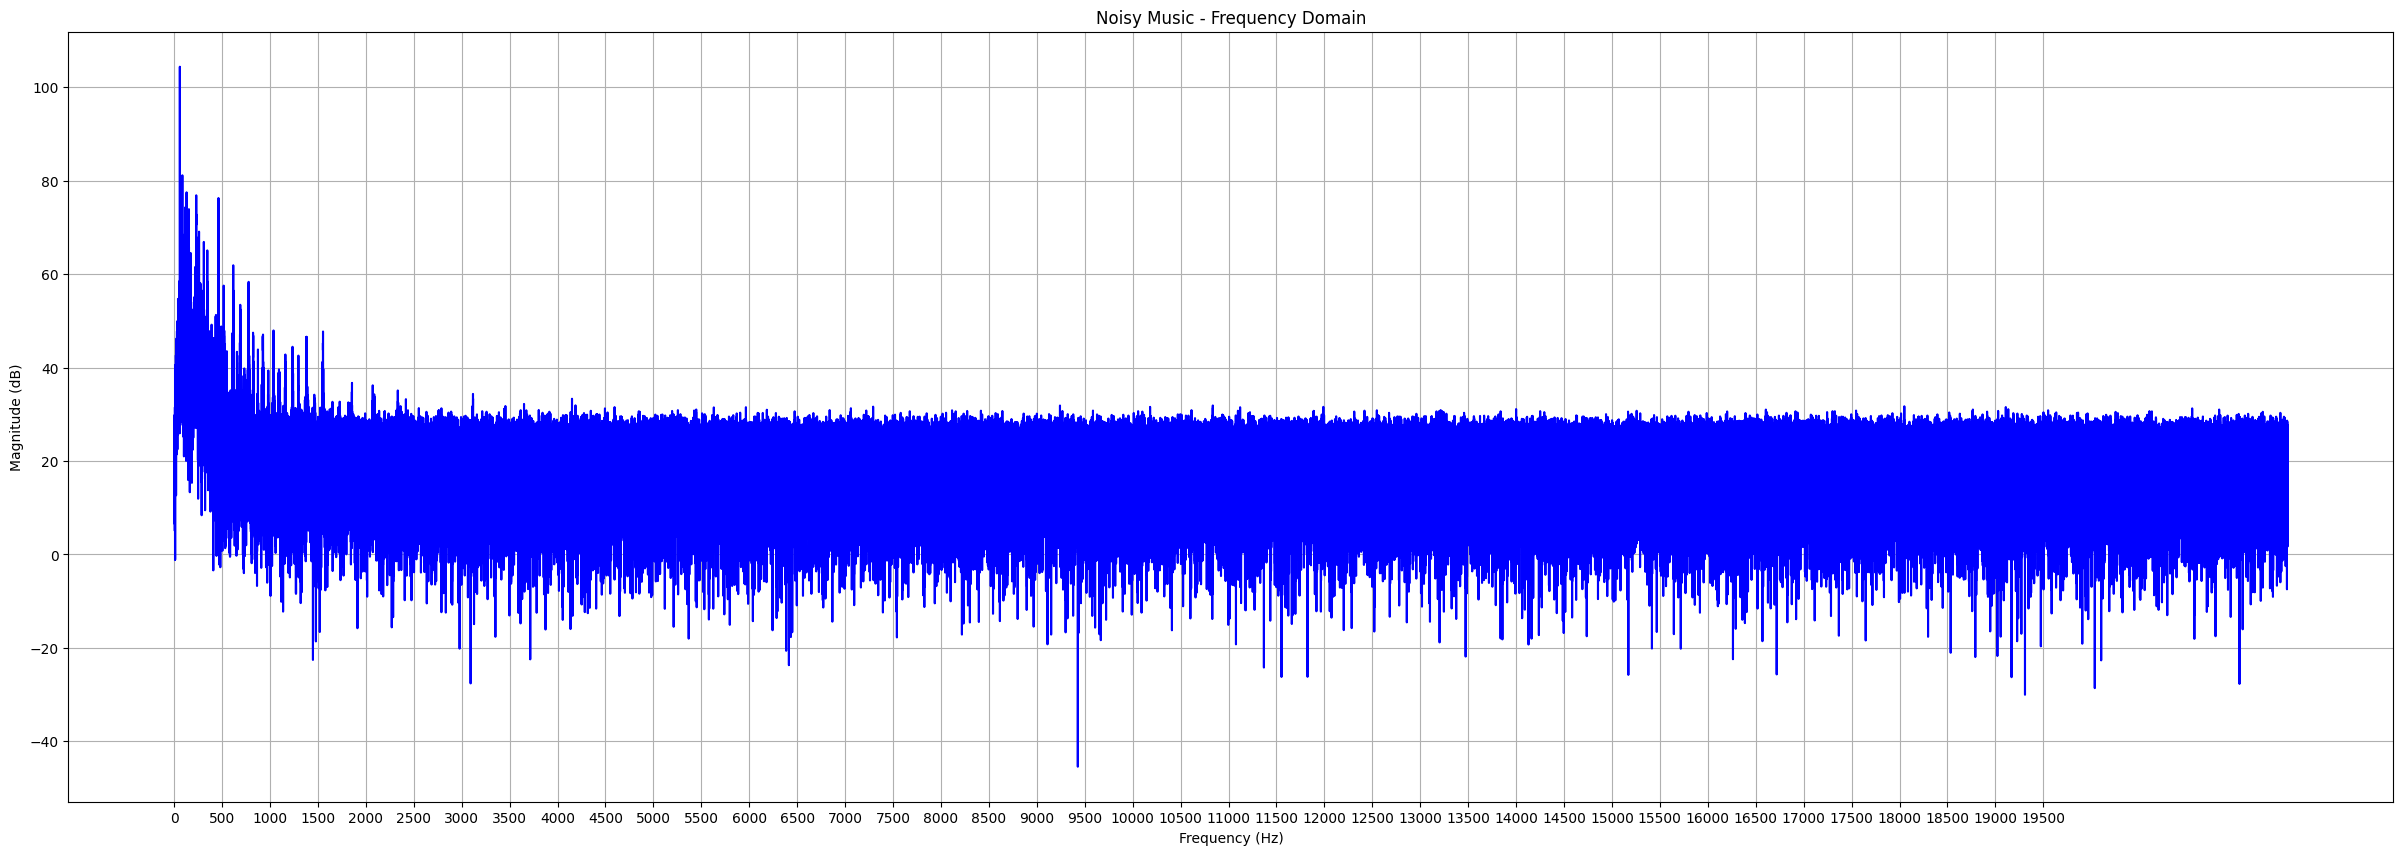

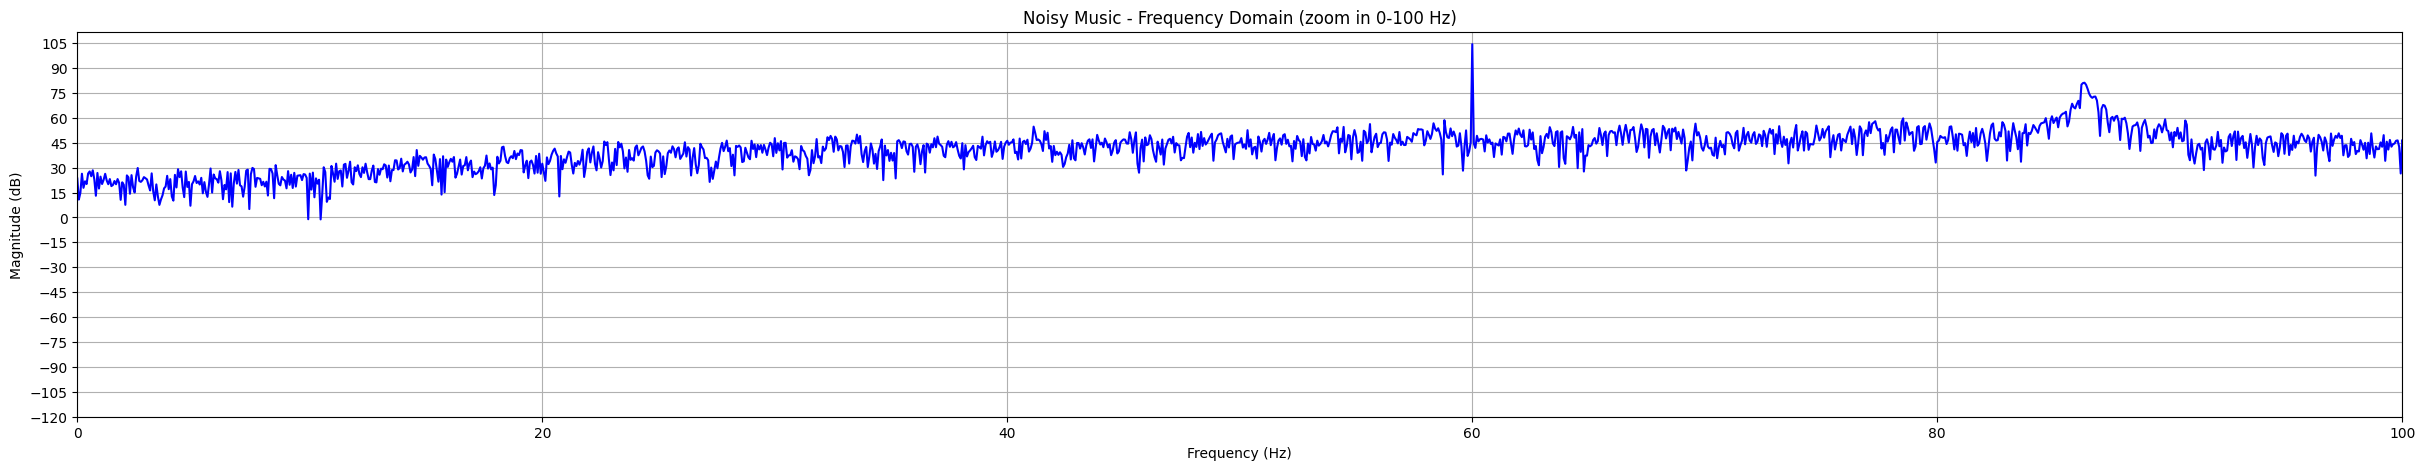

In [88]:
mat_file = 'Data/Practical Problem/noisymusic.mat'
mat_contents = io.loadmat(mat_file)

Fs = int(mat_contents['Fs'])
y = np.array(mat_contents['y'])
y_flat = y.flatten()
N = len(y)

# print(Fs)
Ts = 1/Fs
t = np.arange(0, N * Ts, Ts)

# print(N)
# print(N * Ts)

plt.figure(figsize=(30, 5))
plt.plot(t, y_flat)
plt.title('Noisy Music - Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
# plt.xticks(np.arange(0, 20, 0.5))
plt.show()

yf = fft.fft(y_flat)
mag_yf = np.abs(yf)
freq_yf = fft.fftfreq(N, Ts)

plt.figure(figsize=(30, 10))
plt.plot(freq_yf[:N//2], 20*np.log10(mag_yf)[:N//2], 'b')
plt.title('Noisy Music - Frequency Domain')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
# plt.xlim(0, 20000)
plt.xticks(np.arange(0, 20000, 500))
# plt.yticks(np.arange(-120, 120, 15))
plt.grid(True)
plt.show()

plt.figure(figsize=(30, 5))
plt.plot(freq_yf[:N//2], 20*np.log10(mag_yf)[:N//2], 'b')
plt.title('Noisy Music - Frequency Domain (zoom in 0-100 Hz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.xlim(0, 100)
# plt.xticks(np.arange(0, 2000, 60))
plt.yticks(np.arange(-120, 120, 15))
plt.grid(True)
plt.show()

sd.play(y_flat, Fs)

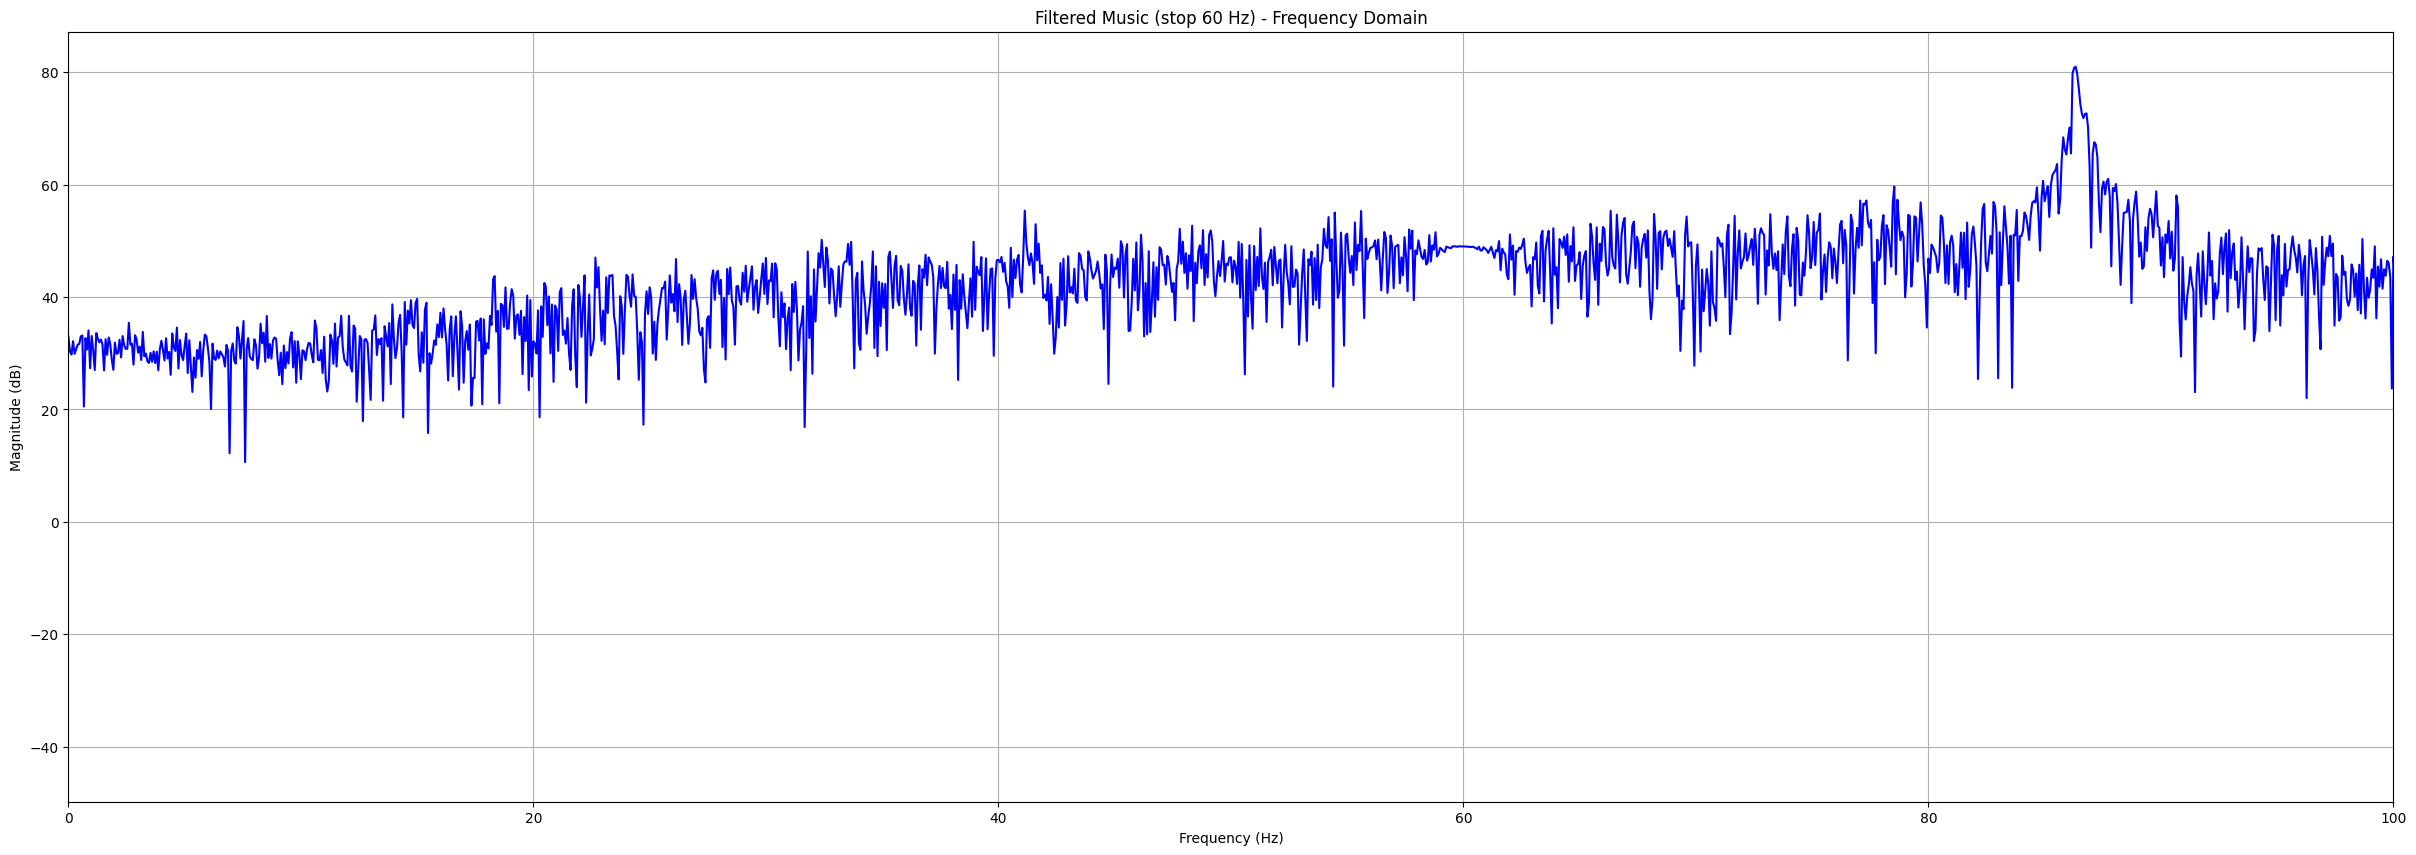

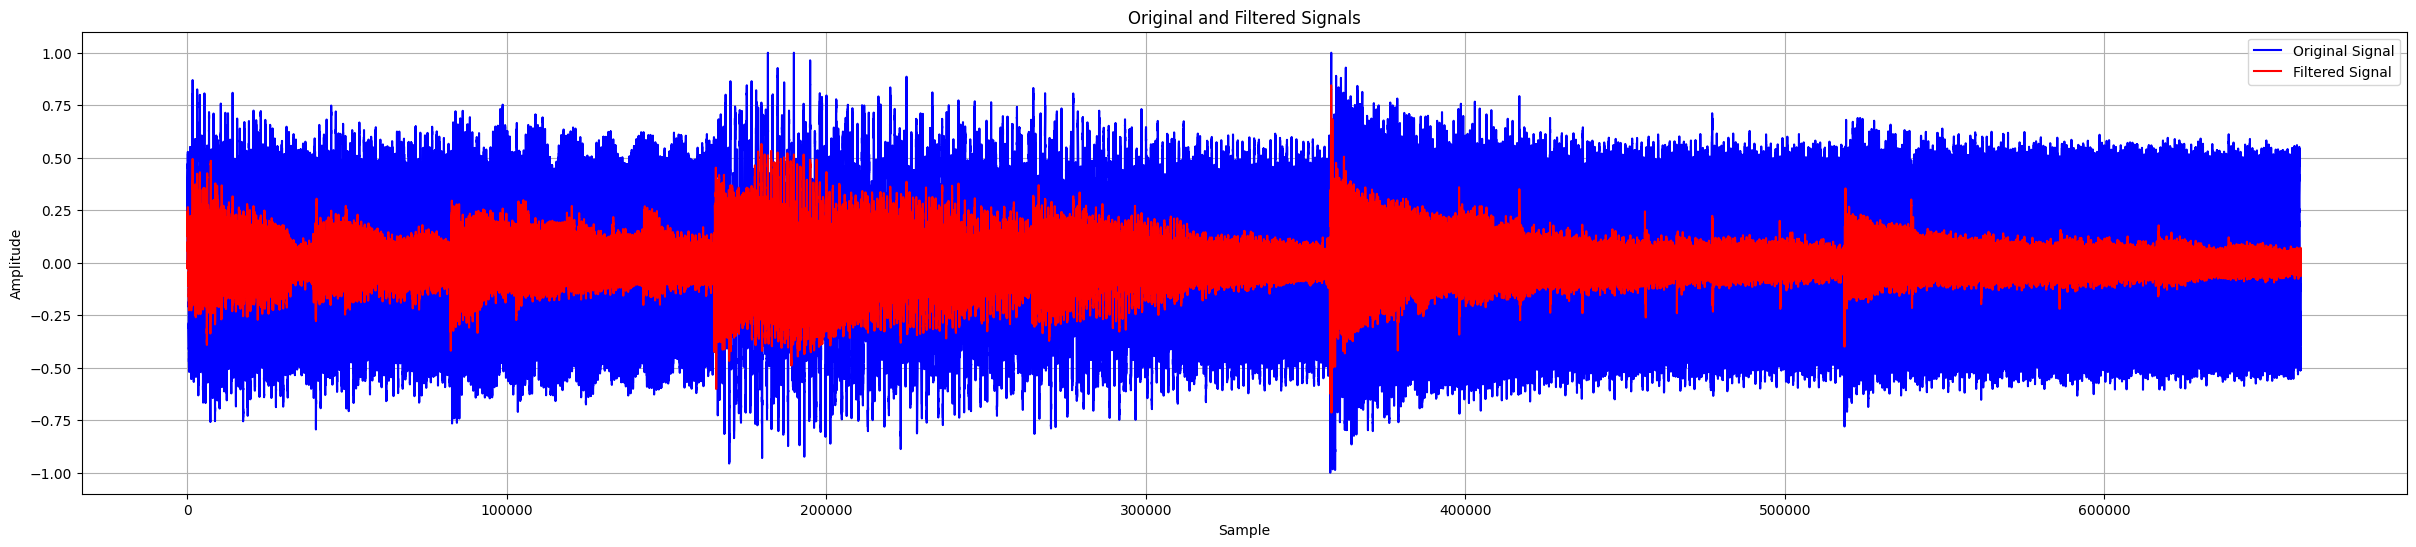

In [89]:
cutoff_hz = 60

b, a = signal.iirnotch(cutoff_hz, Q=10, fs=Fs)

filtered_signal = signal.filtfilt(b, a, y_flat)  # Apply band-stop filter

yf = fft.fft(filtered_signal)
mag_yf = np.abs(yf)
freq_yf = fft.fftfreq(N, Ts)

plt.figure(figsize=(30, 10))
plt.plot(freq_yf[:N//2], 20*np.log10(mag_yf)[:N//2], 'b')
plt.title('Filtered Music (stop 60 Hz) - Frequency Domain')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.xlim(0, 100)
# plt.xticks(np.arange(0, 10000, 500))
# plt.yticks(np.arange(-120, 120, 15))
plt.grid(True)
plt.show()

plt.figure(figsize=(30, 6))
plt.plot(y_flat, label='Original Signal', color='blue')
plt.plot(filtered_signal, label='Filtered Signal', color='red')
plt.title("Original and Filtered Signals")
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

sd.play(filtered_signal, Fs)

#### Band pass filter 

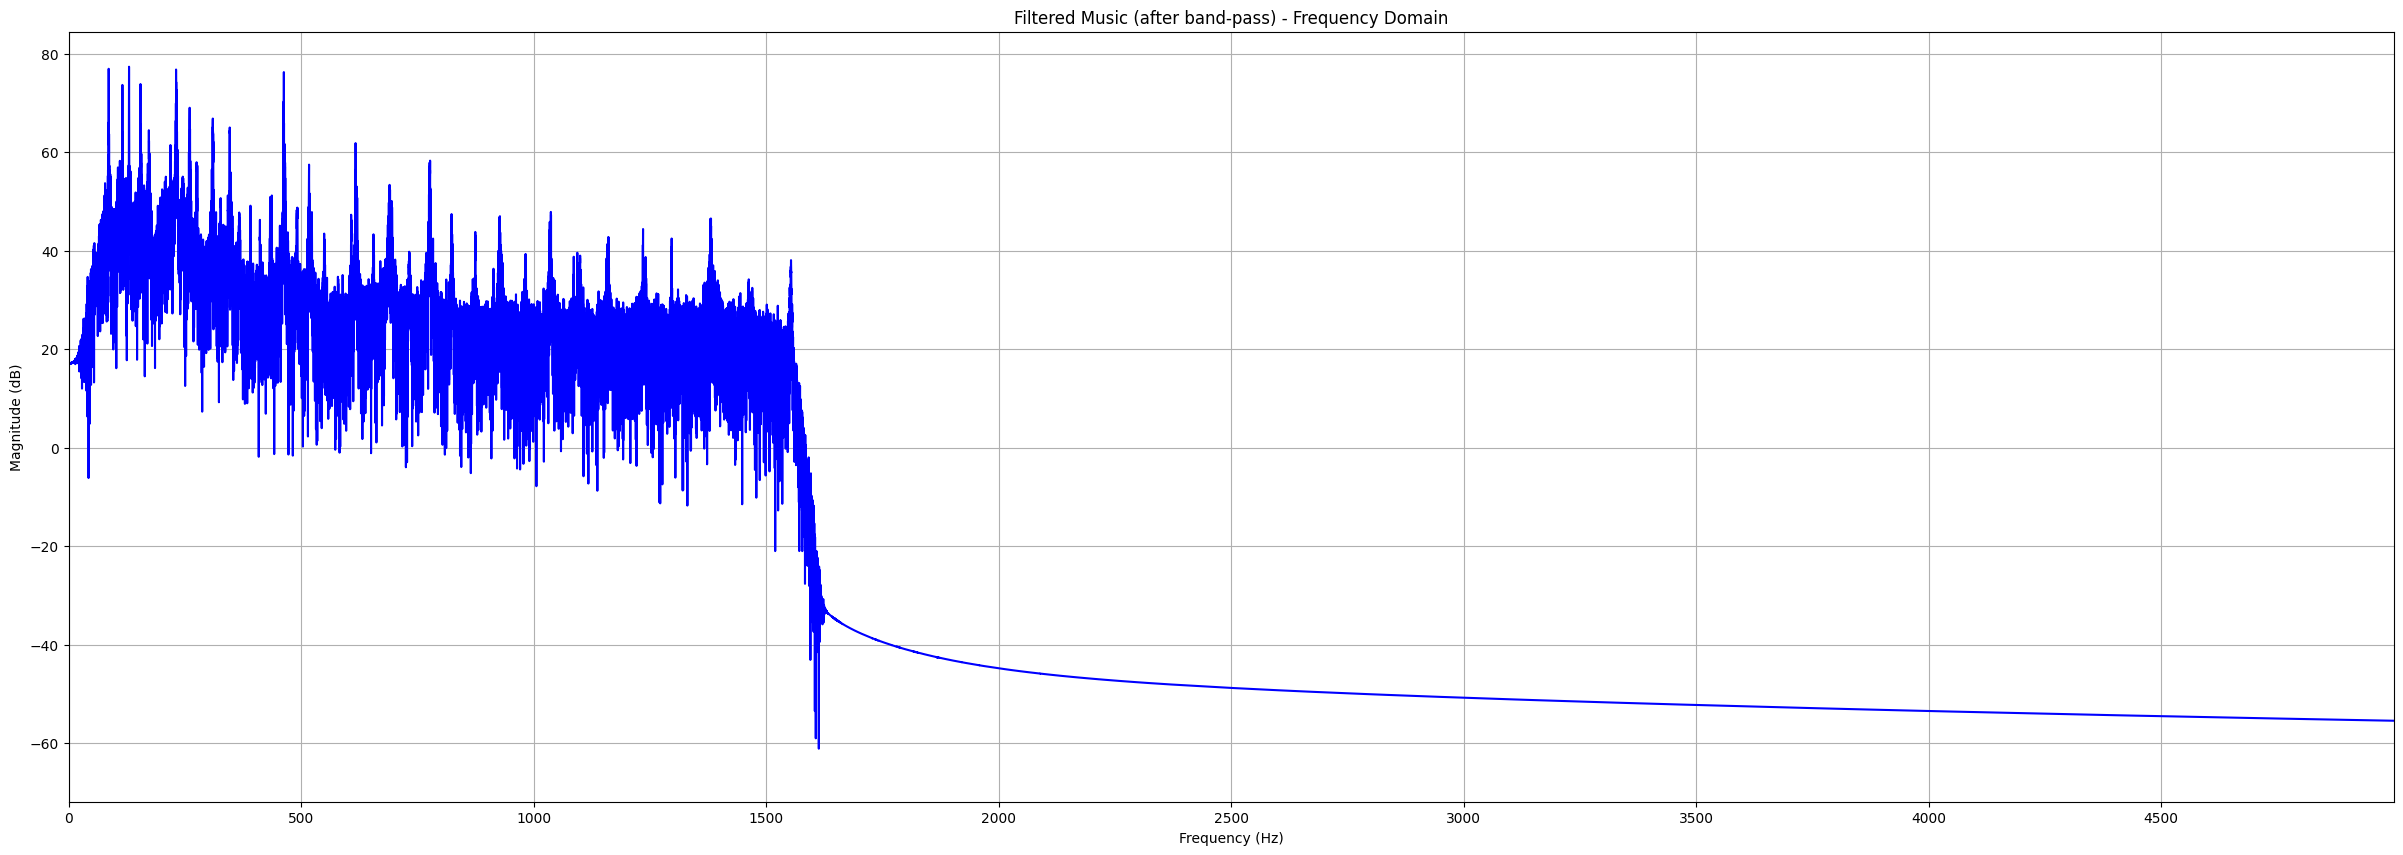

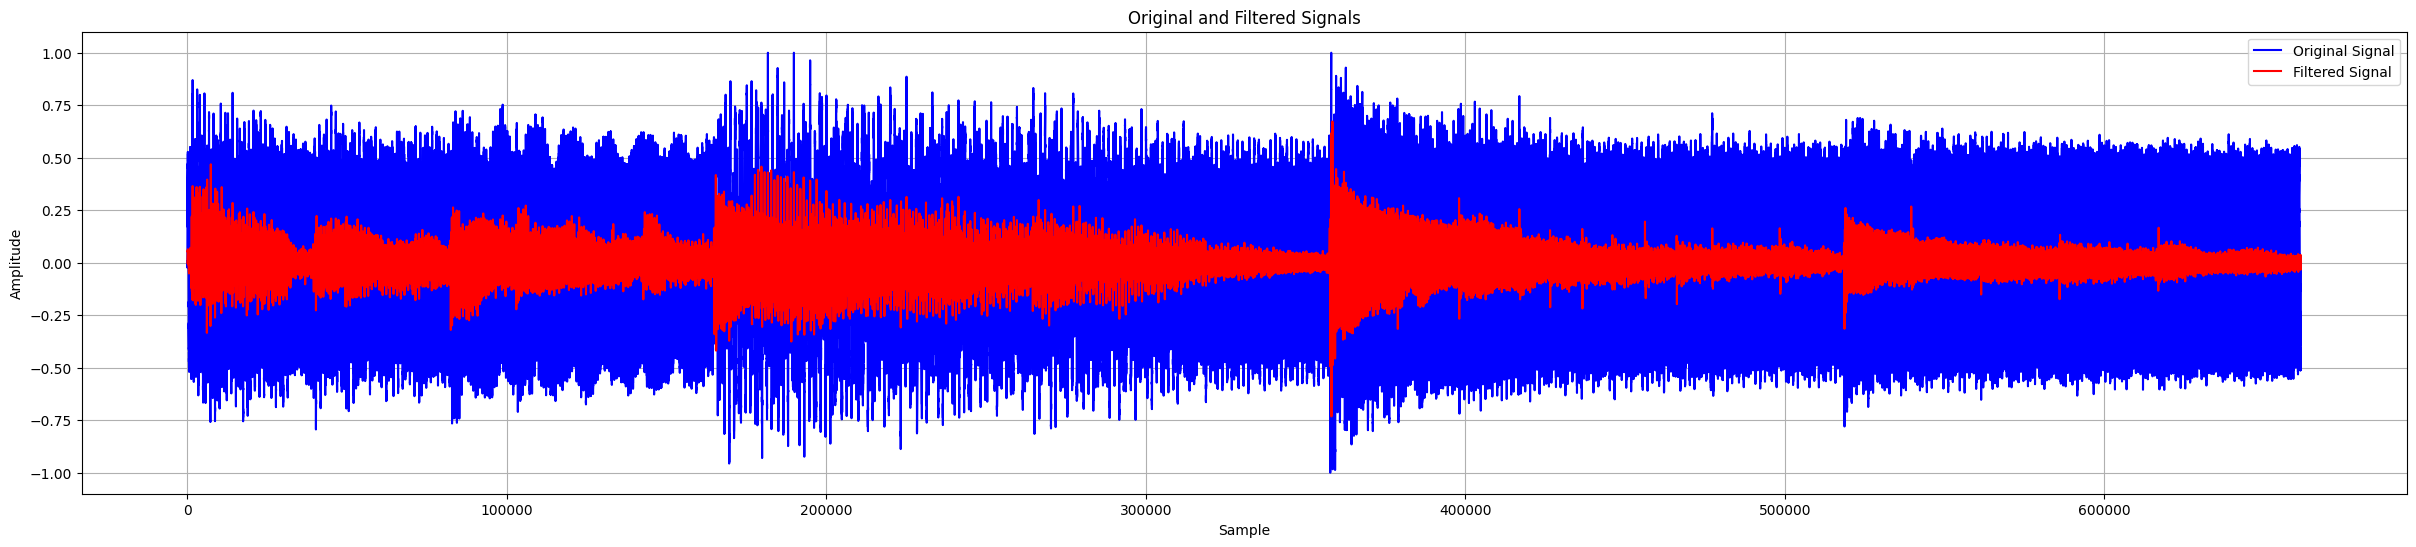

In [90]:
order = 1000
f_low = 60
f_high = 1560

filter_coeff = signal.firwin(order, [f_low * 2 / Fs, f_high * 2 / Fs], pass_zero=False)
filtered_signal1 = signal.filtfilt(filter_coeff, 1, filtered_signal)  # apply band-pass filter

# b, a = signal.butter(order, [f_low * 2 / Fs, f_high * 2 / Fs], btype='band')  # band-pass filter

yf = fft.fft(filtered_signal1)
mag_yf = np.abs(yf)
freq_yf = fft.fftfreq(N, Ts)

plt.figure(figsize=(30, 10))

plt.plot(freq_yf[:N//2], 20*np.log10(mag_yf)[:N//2], 'b')
plt.title('Filtered Music (after band-pass) - Frequency Domain')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.xlim(0, 5000)
plt.xticks(np.arange(0, 5000, 500))
# plt.yticks(np.arange(-120, 120, 15))
plt.grid(True)
plt.show()

plt.figure(figsize=(30, 6))
plt.plot(y_flat, label='Original Signal', color='blue')
plt.plot(filtered_signal1, label='Filtered Signal', color='red')
plt.title("Original and Filtered Signals")
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

sd.play(filtered_signal1, Fs)

#### Median filter

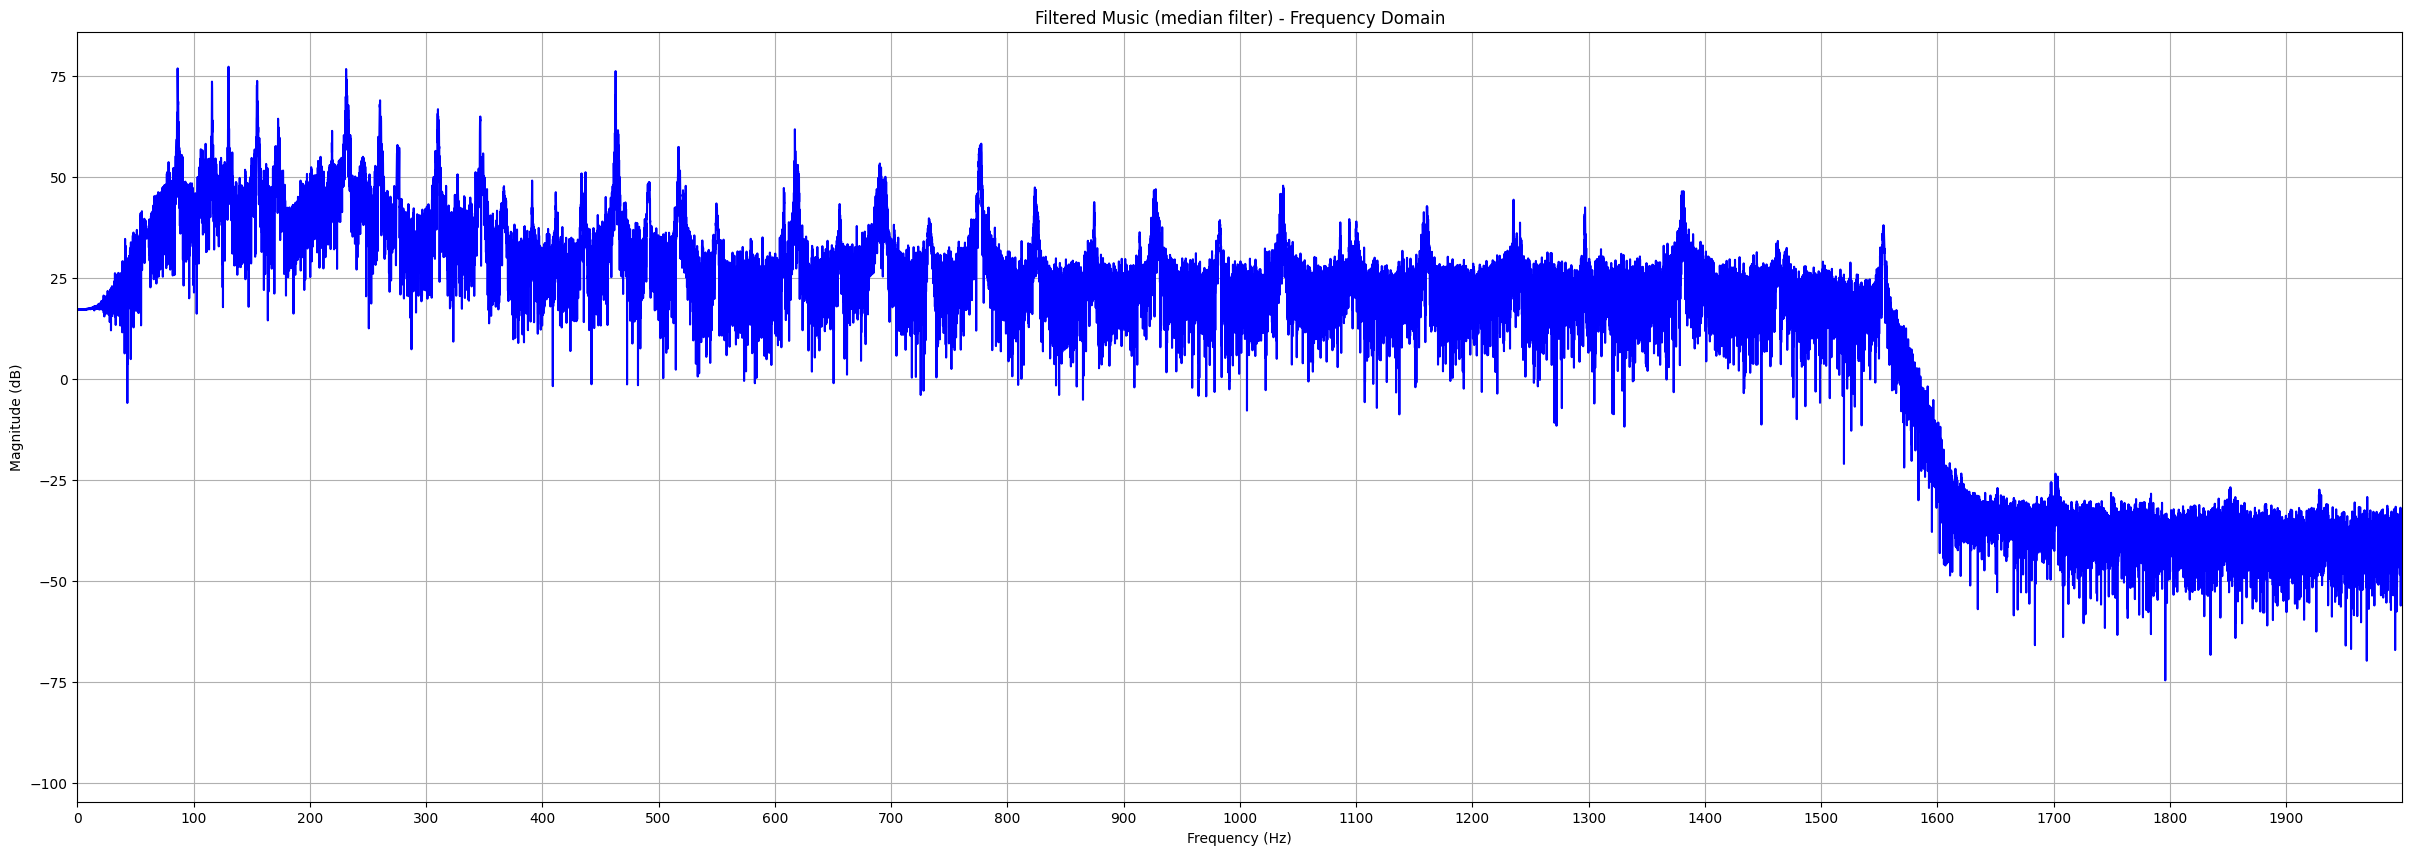

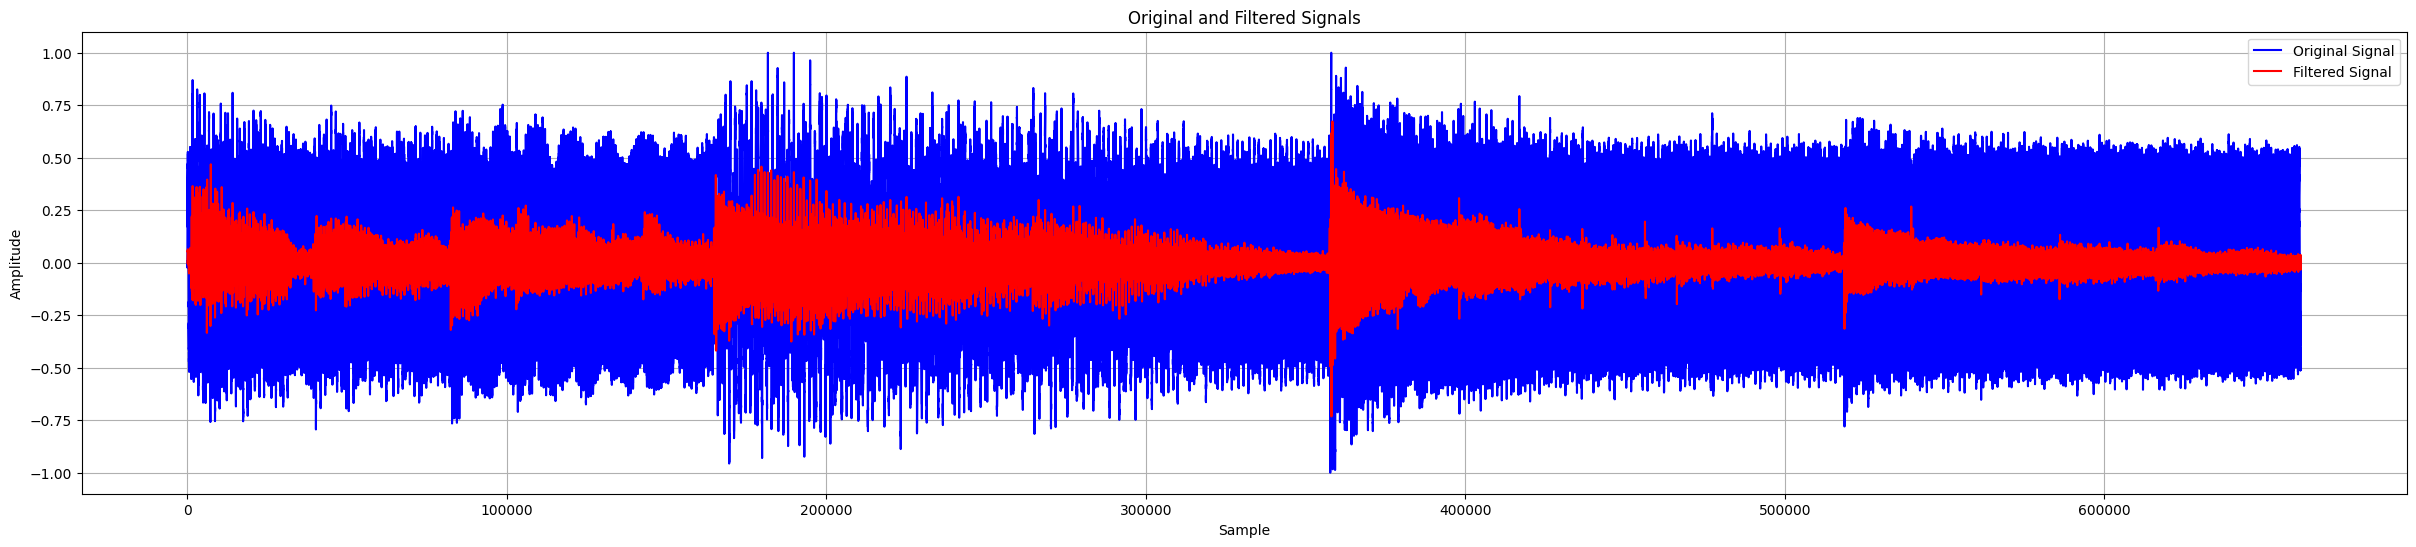

In [93]:

# k=100
# kern=np.ones(2*k+1)/(2*k+1)
# filtered_signal2=np.convolve(filtered_signal1,kern, mode='same')

filtered_signal2 = signal.medfilt(filtered_signal1)


yf = fft.fft(filtered_signal2)
mag_yf = np.abs(yf)
freq_yf = fft.fftfreq(N, Ts)

plt.figure(figsize=(30, 10))

plt.plot(freq_yf[:N//2], 20*np.log10(mag_yf)[:N//2], 'b')
plt.title('Filtered Music (median filter) - Frequency Domain')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.xlim(0, 2000)
plt.xticks(np.arange(0, 2000, 100))
# plt.yticks(np.arange(-120, 120, 15))
plt.grid(True)
plt.show()

plt.figure(figsize=(30, 6))
plt.plot(y_flat, label='Original Signal', color='blue')
plt.plot(filtered_signal1, label='Filtered Signal', color='red')
plt.title("Original and Filtered Signals")
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

sd.play(filtered_signal2, Fs)